## Taxi Duration Prediction

#### Problem defination 
An In-depth exploratory data analysis for the Taxi trip duration prediction. Making sure that all the data variables are explored and patterns uncovered.

#### Hypothesis Generation
Next, we will have to make some exhaustive hypothesis 
###### Number of passengers
- On average cab is taken by two people in the city.
- The number of passengers very by work days and weekends
- The time of the day is a major factor for the number of passengers.


###### Vendor type
- Vendor 2 have more travel time than vendor one
- The direction fo both vendor differ.

###### Time
- The later hours show more traffic
- Is the weekday busier than wekends
- The ending of quater means more taxi rides.
- How do the clusters perform during the day of week and hour of day


###### Duration
- the duration increase with respect with distance.
- In the early hrs the duration is higer for low distance signifying more traffic.
- is number of passengers a factor for duratioin of travel?
- Which clusters leads to more duration

######  Distance
- The distance is corrolates witht he direction of the travel
- on average how is the distance affected by vendor type
- is the duration a factor of the passengers in the cab?
- Does trhe time of the day determine the duration?
- How long does the average trip duration?

## EDA
### Now we Explore the data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster            import MiniBatchKMeans
from sklearn.decomposition      import PCA
from kneed                      import KneeLocator
from sklearn.cluster            import KMeans
from sklearn.preprocessing      import StandardScaler
import warnings


warnings.filterwarnings(action = 'ignore')

In [2]:
#importing data
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
#data head
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
#data head
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [5]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(729322, 11)

In [6]:
#Printing all the columns present in data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
#check for missing variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [8]:
# Identifying variables with object datatype
data.dtypes[data.dtypes == 'object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

In [9]:
# Identifying variables with object datatype
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [10]:
#check the data if it is categorical variable
data.store_and_fwd_flag.value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

#### Summary

* **The pickupdate and time** should be datetime data type 
* **the dropoff date time** should be also datetime data type
* **the vendor_id** is identity variable it is ok at integer
* **the passenger count** is the number of passanger in the car it should integer
* **the trip duration** in seconds can be integer
* convert the **store_and_fwd_flag** to categorical variable
* then convert the **vendor_id** to a categorical variable

### Change the data type of some variables 

In [11]:
# converting "dependents" and "city" to their respective types
data[['pickup_datetime','dropoff_datetime']] = data[['pickup_datetime','dropoff_datetime']].apply(lambda _: pd.to_datetime(_,format='%Y-%m-%d %H:%M:%S.%f', errors='coerce'))
# typecasting "vendor","store fwd flag" " to category type
data['vendor_id'] = data['vendor_id'].astype('category')
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')
# checking
data[['pickup_datetime','dropoff_datetime']].dtypes

pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object

### Verify the duration variable 
Create new column and verify the trip duratrion.

In [12]:
data['duration'] = data.apply(lambda x: (x['dropoff_datetime'] - x['pickup_datetime']).seconds, axis=1)

In [13]:
#check if the two varables are similar if so then drop one
data[['duration','trip_duration']][:]

,duration,trip_duration
0,400,400
1,1100,1100
2,1635,1635
3,1141,1141
4,848,848
...,...,...
729317,296,296
729318,315,315
729319,673,673
729320,447,447


### Feature Engineering 
##### Create the date and time for pick_up

In [14]:
# converting "dependents" and "city" to their respective types
data[['pickup_datetime','dropoff_datetime']] = data[['pickup_datetime','dropoff_datetime']].apply(lambda _: pd.to_datetime(_,format='%Y-%m-%d %H:%M:%S.%f', errors='coerce'))

new_df = pd.DataFrame({"pickup_year":      data['pickup_datetime'].dt.year,
                       "pickup_month":     data['pickup_datetime'].dt.week,
                       "pickup_day":       data['pickup_datetime'].dt.day,
                       "pickup_dayofyear": data['pickup_datetime'].dt.dayofyear,
                       "pickup_dayofweek": data['pickup_datetime'].dt.weekday,
                       "pickup_quarter":    data['pickup_datetime'].dt.quarter,
                       "pickup_hour":      data['pickup_datetime'].dt.hour,
                       "pickup_minute":    data['pickup_datetime'].dt.minute
                      })
#concatenate the newly formed data set
combined_data = pd.concat([data,new_df], axis=1) 
#drop the unecessarytime data set
combined_data = combined_data.drop(columns=['pickup_datetime','dropoff_datetime','trip_duration']) 

#### Get the distance travelled and the direction of the travel

In [15]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def direction_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))


combined_data['distance'] = haversine_array(combined_data['pickup_latitude'].values, 
                                                     combined_data['pickup_longitude'].values, 
                                                     combined_data['dropoff_latitude'].values, 
                                                     combined_data['dropoff_longitude'].values)


combined_data['direction'] = direction_array(combined_data['pickup_latitude'].values, 
                                          combined_data['pickup_longitude'].values, 
                                          combined_data['dropoff_latitude'].values, 
                                          combined_data['dropoff_longitude'].values)

#### Get the manhattan_distance 
* In this move we seek to get the optimal taxi path distance between two location. You know Taxi do not go direct distance, instead they go through a dummy. Point 1 to 2 (Distance A)and point 2 to 3 (Distance B).

In [16]:
#make the manhatan distance 
def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

combined_data['manhattan_dist'] = dummy_manhattan_distance(combined_data['pickup_latitude'].values, 
                                                     combined_data['pickup_longitude'].values, 
                                                     combined_data['dropoff_latitude'].values, 
                                                     combined_data['dropoff_longitude'].values)


### Get the cluster for Pick-up and Drop-off
* This tends to cluster closeby pickup location. Believeing that they share common characteristics. Here we will apply the KMeans Algorithm. 
* We decided to choose 70 clusters. 

In [17]:
#Set clusters
coords = np.vstack((combined_data[['pickup_latitude', 'pickup_longitude']].values,
                    combined_data[['dropoff_latitude', 'dropoff_longitude']].values,
                    combined_data[['pickup_latitude', 'pickup_longitude']].values,
                    combined_data[['dropoff_latitude', 'dropoff_longitude']].values))


sample_ind = np.random.permutation(len(coords))[:400000]


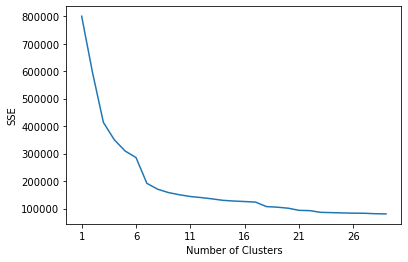

CPU times: user 28min 39s, sys: 3min 23s, total: 32min 3s
Wall time: 4min 28s


In [19]:
%%time
#first scale data then find the optimal scale using bseline model kmeans
scaler = StandardScaler()
scaled_features = scaler.fit_transform(coords[sample_ind])
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

### A list holds the SSE values for each k
sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    
#plot to view the elbow
plt.plot(range(1, 30), sse)
plt.xticks(range(1,30,5))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [20]:
#rather than Eyeballing lets use the Knee locator to find the optimal clusters.
kl = KneeLocator(range(1, 30), sse, curve="convex", direction="decreasing")
kl.elbow

7

- The optimal cluster is 4 using the Knee Locator module.
- Apply then clusters and create new variable pickoff and dropoff clusters

In [21]:
kmeans = MiniBatchKMeans(n_clusters=4, batch_size=10000).fit(coords[sample_ind])
combined_data.loc[:, 'pickup_cluster'] = kmeans.predict(combined_data[['pickup_latitude', 'pickup_longitude']])
combined_data.loc[:, 'dropoff_cluster'] = kmeans.predict(combined_data[['dropoff_latitude', 'dropoff_longitude']])

In [22]:
combined_data.loc[:, 'pickup_cluster'].value_counts()

0    530632
2    119371
3     62426
1     16893
Name: pickup_cluster, dtype: int64

#### Reducing the Long and Lat 
This isnt only about Dimension rediuction this is still the 2D position data as known.\
The rotation could help for decision tree splits, and it did actually.

In [23]:
#Use PCA to scale the longitude and latitude
pca = PCA().fit(coords)
combined_data['pickup_pca0'] = pca.transform(combined_data[['pickup_latitude', 'pickup_longitude']])[:, 0]
combined_data['pickup_pca1'] = pca.transform(combined_data[['pickup_latitude', 'pickup_longitude']])[:, 1]
combined_data['dropoff_pca0'] = pca.transform(combined_data[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
combined_data['dropoff_pca1'] = pca.transform(combined_data[['dropoff_latitude', 'dropoff_longitude']])[:, 1]

In [24]:
# typecasting "vendor","store fwd flag" " to category type
combined_data['vendor_id'] = combined_data['vendor_id'].astype('category')
combined_data['pickup_cluster'] = combined_data['pickup_cluster'].astype('category')
combined_data['dropoff_cluster'] = combined_data['dropoff_cluster'].astype('category')
#drop this feature as it happens after the cab leaves the monitored area
combined_data= combined_data.drop(['store_and_fwd_flag','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis=1)


## Univariate analysis Numerical Variables

In [25]:
combined_data.select_dtypes(include=['int64','float64','category']).dtypes

vendor_id           category
passenger_count        int64
duration               int64
pickup_year            int64
pickup_month           int64
pickup_day             int64
pickup_dayofyear       int64
pickup_dayofweek       int64
pickup_quarter         int64
pickup_hour            int64
pickup_minute          int64
distance             float64
direction            float64
manhattan_dist       float64
pickup_cluster      category
dropoff_cluster     category
pickup_pca0          float64
pickup_pca1          float64
dropoff_pca0         float64
dropoff_pca1         float64
dtype: object

In [26]:
# seggregating variables into groups
people = ['passenger_count','duration']
route  = ['direction', 'distance','manhattan_dist']
time1  = ['pickup_minute','pickup_hour','pickup_day']
time2  = ['pickup_year','pickup_month', 'pickup_quarter']
time3  = ['pickup_dayofweek','pickup_dayofyear']

In [27]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

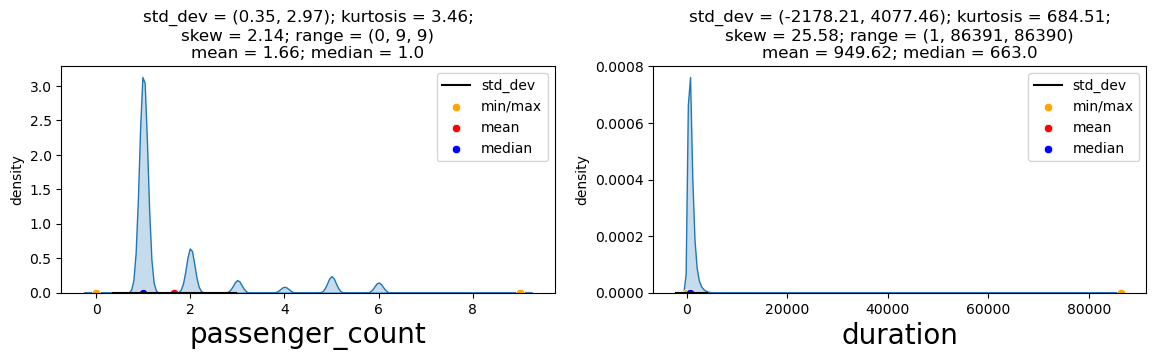

In [28]:
UVA_numeric(combined_data, people)

### summary 
- Passenger count
    * The plot shows that on average 1.66 perssangers on each ride.\
    * The range of data is from 0-9\
    * The data id possitively skewed there is few outliers present. 
- duration
    * The **skew** +25.58 shows it is possitively biased data\
    * Also the kurtosis justifies the presence of extreem numberew in the data 




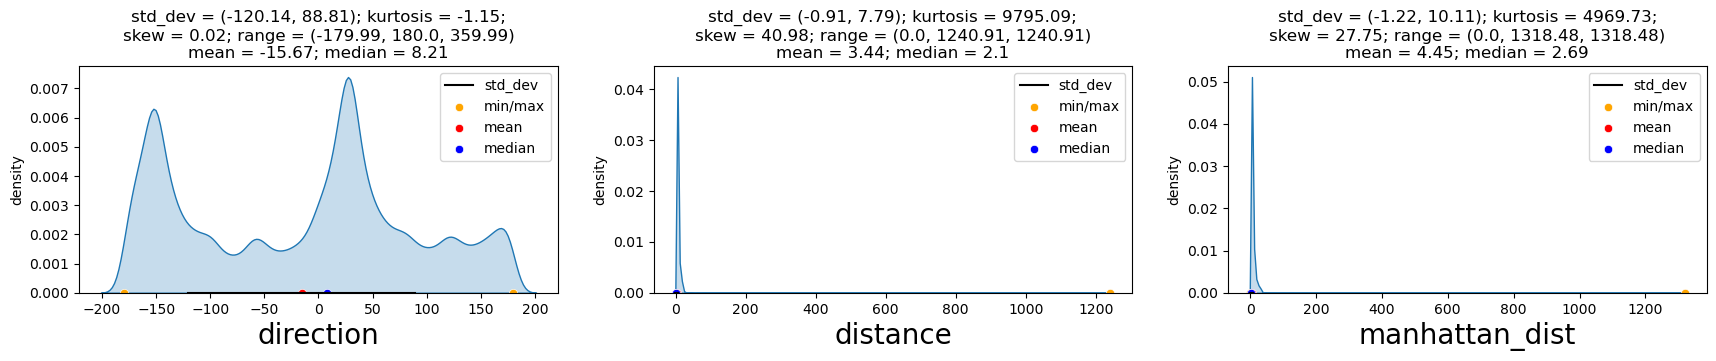

In [29]:

UVA_numeric(combined_data, route)

#### Summary
* **Direction**
    * The two high spots shows the bearing **direction** each way of the taxi trips\ -170° and 25°
    * There is almost as much trips on either side of the traffic. 
    * it is an almost zero **skew** . evenly distributed

* **Distance**
    * The **distance** is possitively skewed
    * The +40.98 value for **skew** shows it is possitively skewed data.\
    * **Kurtosis 9795** shows there is presence of extreem numbers and outliers
    * The **Range** of the distance is 0- 1240km
    * The data contains alot of outliers as seen the max diatance is 1240km
* **manhattan_dist**
    * The **mean distance** is 4.45km 
    * The **kurtosis** of 4969.73 affirms presence of outlier. 
    * The values ar in **range** 0 to 1318km


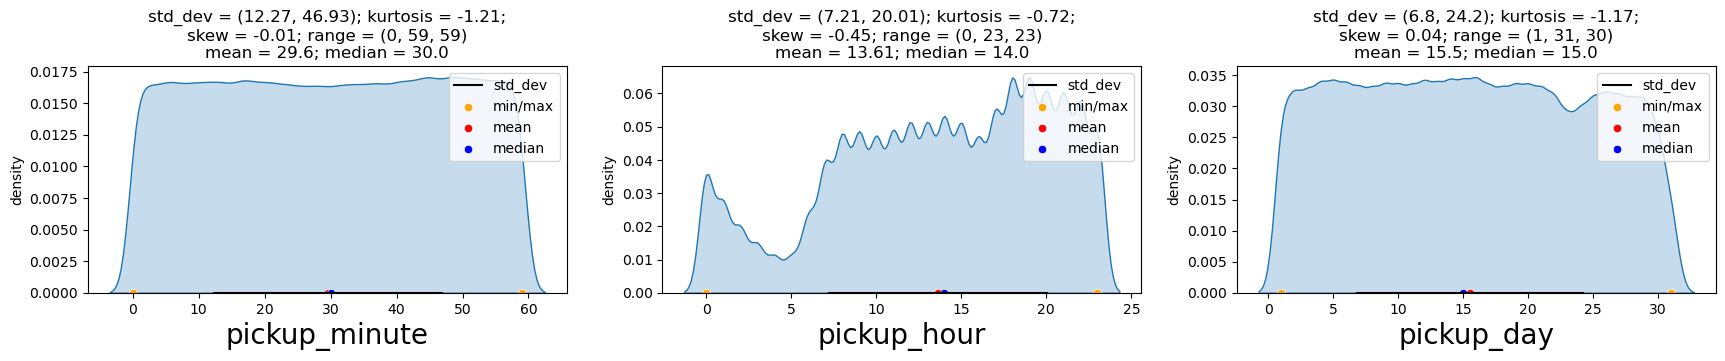

In [30]:
UVA_numeric(combined_data, time1)

#### Sumary
* **Minute**
    * The minute chart shows that the minute is not showing enough information
    * Attention will not be placed here
* **Hour**
    * The busiest hr is from 17:00hrs to 24:00hrs\
    * The lowest **traffic** is experienced at 5:00hrs\
    * At 6:00hrs the demain becomes step again rising through to 8:00hrs\
    * The **kurtosis** value of -0.72 means ther is less outlier present in the data. 

* **Day**
    * The daily demand for taxi ride remains constant from the 1st through the 24th day\
    * A slight decrase in demand in the 25day, this can be as resunt of a holiday. 

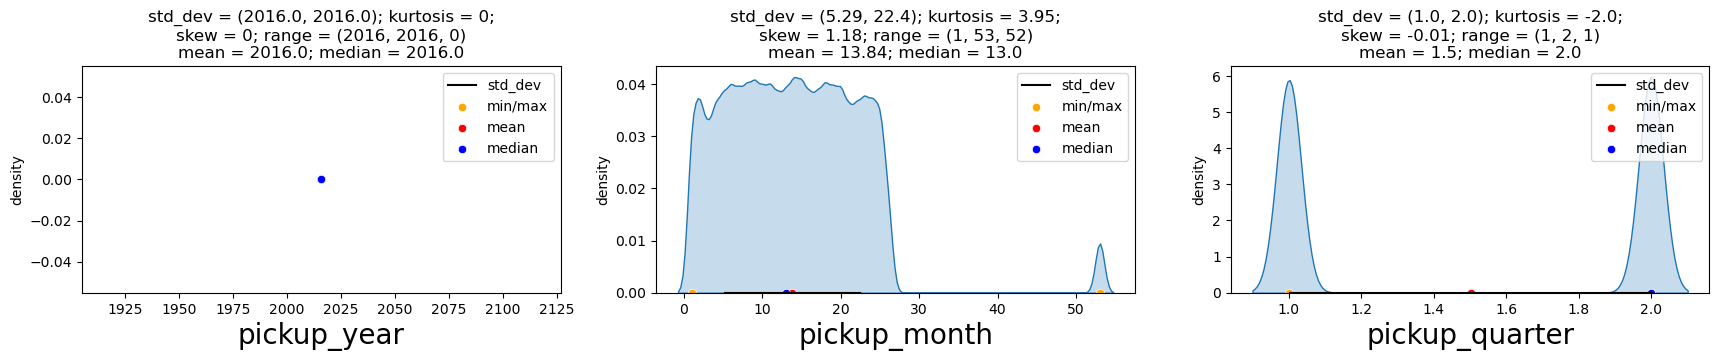

In [31]:
UVA_numeric(combined_data, time2)

#### Summary
* **Year**
    * Very interesting data value here as the data represent mostly the data from two years

* **Month** 
    * The mothly distribution is quite interesting also ther seems to be two group.
    * The first to 27th month and the 50th month
    * why was there a data gap? More research to be conducted

* **Quarter**
    * There is mostly data from quater one and two
    * Even though the dta sgows a 24 month period most of the data is from the first and the second quarter. This represents a pattern. 


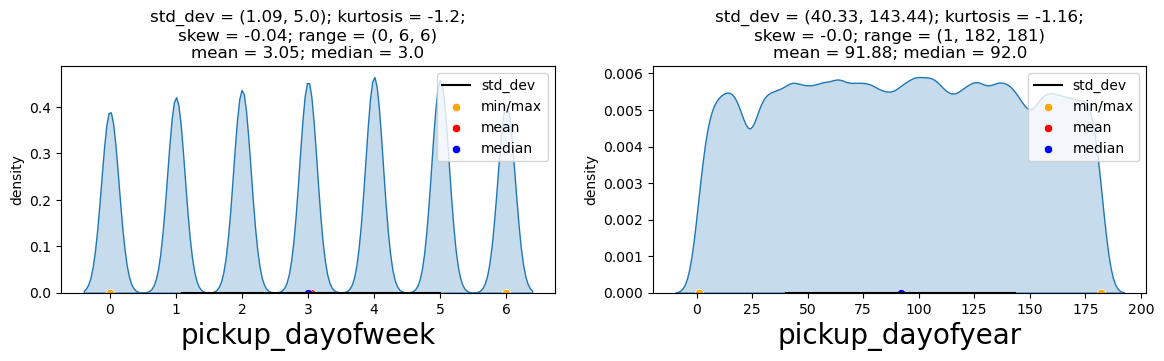

In [32]:
UVA_numeric(combined_data, time3)

#### Summary
- Day of week
The data shows the taxi ride peaks at thursday \
There is demand all through the week, monday to saturday.\
Sunday shows little or no data\
- Year
almost a smooth curve for the day of year\
Ofcourse there are some days demand slowed like the 25th and 150day\
A quick verification show that Jan 25th and May 27th are a holidays in the USA.


## Univariate Analysis : Categorical Varibales

In [33]:
combined_data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

id                   object
vendor_id          category
pickup_cluster     category
dropoff_cluster    category
dtype: object

In [34]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

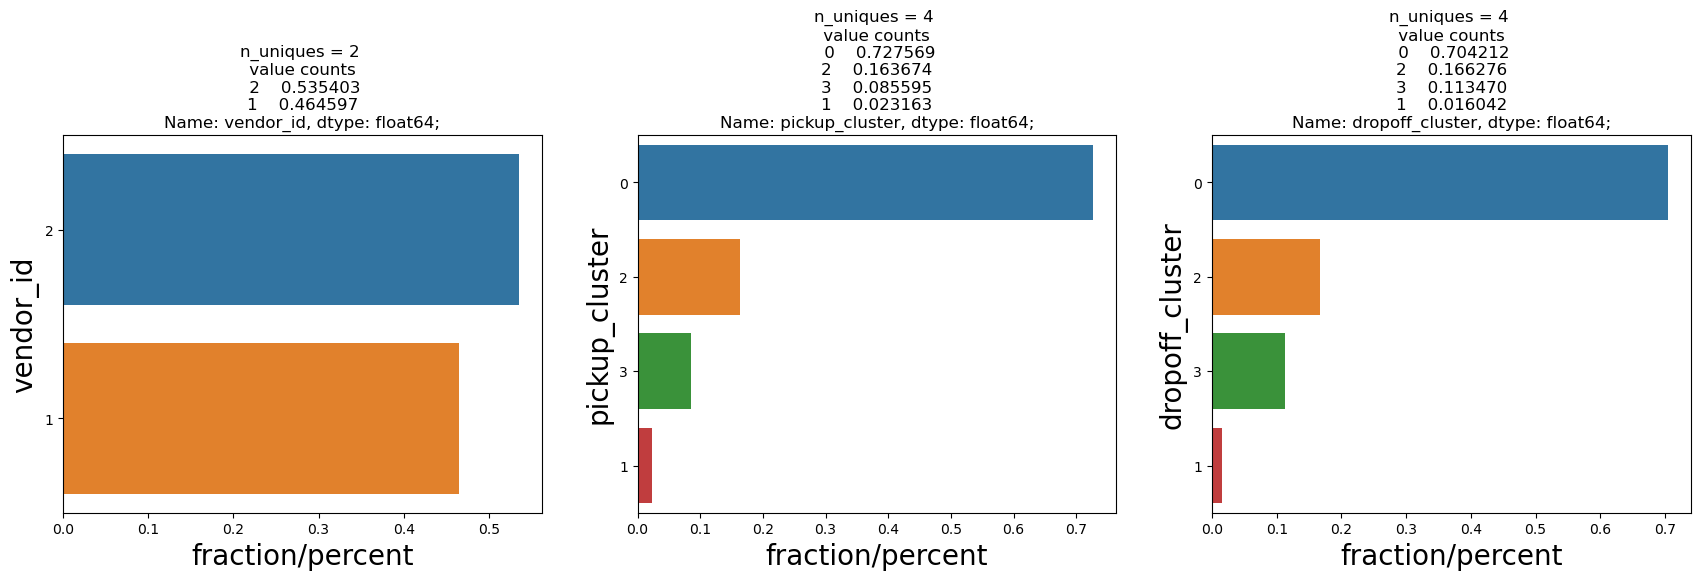

In [35]:
# Custom function for easy visualisation of Categorical Variables
UVA_category(combined_data, ['vendor_id','pickup_cluster','dropoff_cluster'])

### Summary
* **Vendors**
    * The vendors are performing great the unique counts shows that Vendor 2 has more bookings than vendor 1
* **pickup_clusters**
    * 53.3% of the whold taxi leave from first cluster 0
    * The second busiest cluster is the second cluster 1 with 37% tave offs
* **pickup_clusters**
    * Also, almost 53% of the taxi cab are arriving from the first cluster 0
    * The second busiest cluster is cluster 1 which have 36% of the total dropoffs.

### Univariate:  Missing values Numerical

In [36]:
combined_data.isnull().sum()

id                  0
vendor_id           0
passenger_count     0
duration            0
pickup_year         0
pickup_month        0
pickup_day          0
pickup_dayofyear    0
pickup_dayofweek    0
pickup_quarter      0
pickup_hour         0
pickup_minute       0
distance            0
direction           0
manhattan_dist      0
pickup_cluster      0
dropoff_cluster     0
pickup_pca0         0
pickup_pca1         0
dropoff_pca0        0
dropoff_pca1        0
dtype: int64

#### Summary
The data is totally free from missing values 
It saves alot of time for more hypothesis 

### Outlier Presence 

In [37]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True


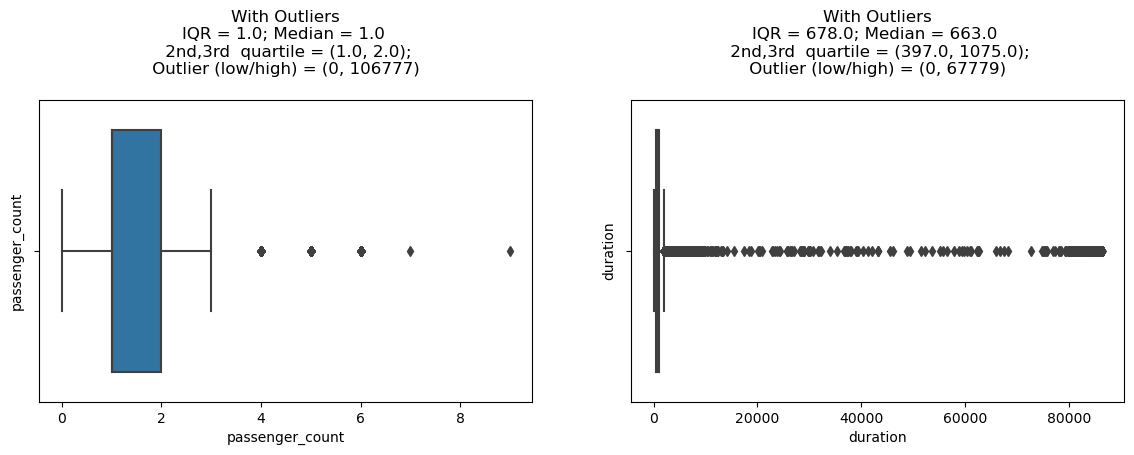

In [38]:
UVA_outlier(data, people)

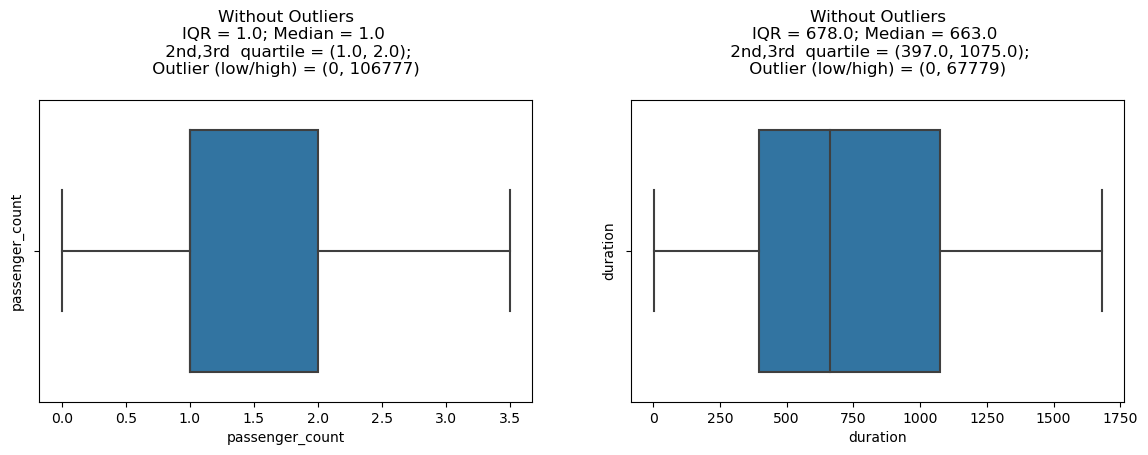

In [39]:
UVA_outlier(data, people, include_outlier = False)

### Summary 
* The outliers removed the values mean and mode are shown above\
* **passenger count**
    * **Median ** value is 1 
    * The average number of passengers in the cab is between 1 and 2 passengers 
* **duration**
    * **Median** value is 663 seconds about 11min 
    * The **range** of the time is between 397 and 1075 sec


## Bivariate Analysis : Numerical-Numerical

In [40]:
# isolating numerical datatypes
numerical = combined_data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

passenger_count       int64
duration              int64
pickup_year           int64
pickup_month          int64
pickup_day            int64
pickup_dayofyear      int64
pickup_dayofweek      int64
pickup_quarter        int64
pickup_hour           int64
pickup_minute         int64
distance            float64
direction           float64
manhattan_dist      float64
pickup_pca0         float64
pickup_pca1         float64
dropoff_pca0        float64
dropoff_pca1        float64
dtype: object

### Correlation Matrix

In [41]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,passenger_count,duration,pickup_year,pickup_month,pickup_day,pickup_dayofyear,pickup_dayofweek,pickup_quarter,pickup_hour,pickup_minute,distance,direction,manhattan_dist,pickup_pca0,pickup_pca1,dropoff_pca0,dropoff_pca1
passenger_count,1.000000,0.016510,NaN,0.005154,0.001737,-0.001182,0.025758,0.000337,0.009851,-0.000213,0.009175,0.000497,0.009398,-0.001010,-0.004842,0.000162,-0.003985
duration,0.016510,1.000000,NaN,0.011020,0.002240,0.013040,-0.001971,0.012424,0.005452,-0.004537,0.152200,0.002781,0.152863,-0.040093,-0.050092,-0.023973,-0.039126
pickup_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_month,0.005154,0.011020,NaN,1.000000,0.000254,0.713257,0.039290,0.656614,-0.016984,-0.001220,0.021710,-0.001816,0.021974,-0.006412,-0.005679,-0.005428,-0.003149
pickup_day,0.001737,0.002240,NaN,0.000254,1.000000,0.153732,0.005639,-0.014326,-0.001699,-0.001369,0.005136,-0.000924,0.004896,0.001579,-0.006159,0.000501,-0.006112
pickup_dayofyear,-0.001182,0.013040,NaN,0.713257,0.153732,1.000000,-0.012497,0.862306,-0.003549,-0.000564,0.017201,-0.001640,0.017215,-0.003689,-0.001756,-0.003685,-0.002134
pickup_dayofweek,0.025758,-0.001971,NaN,0.039290,0.005639,-0.012497,1.000000,0.005185,-0.082079,-0.000051,0.007786,0.012879,0.007279,0.016928,-0.026778,0.002219,-0.022082
pickup_quarter,0.000337,0.012424,NaN,0.656614,-0.014326,0.862306,0.005185,1.000000,-0.004197,0.000471,0.014235,-0.000847,0.014296,-0.004134,-0.000963,-0.003521,-0.000366
pickup_hour,0.009851,0.005452,NaN,-0.016984,-0.001699,-0.003549,-0.082079,-0.004197,1.000000,-0.003542,-0.016269,-0.022307,-0.015925,-0.011098,0.009917,0.021400,0.017277
pickup_minute,-0.000213,-0.004537,NaN,-0.001220,-0.001369,-0.000564,-0.000051,0.000471,-0.003542,1.000000,-0.007427,0.000551,-0.007416,0.003600,0.003342,0.003489,0.003300


In [42]:
### Heatmap

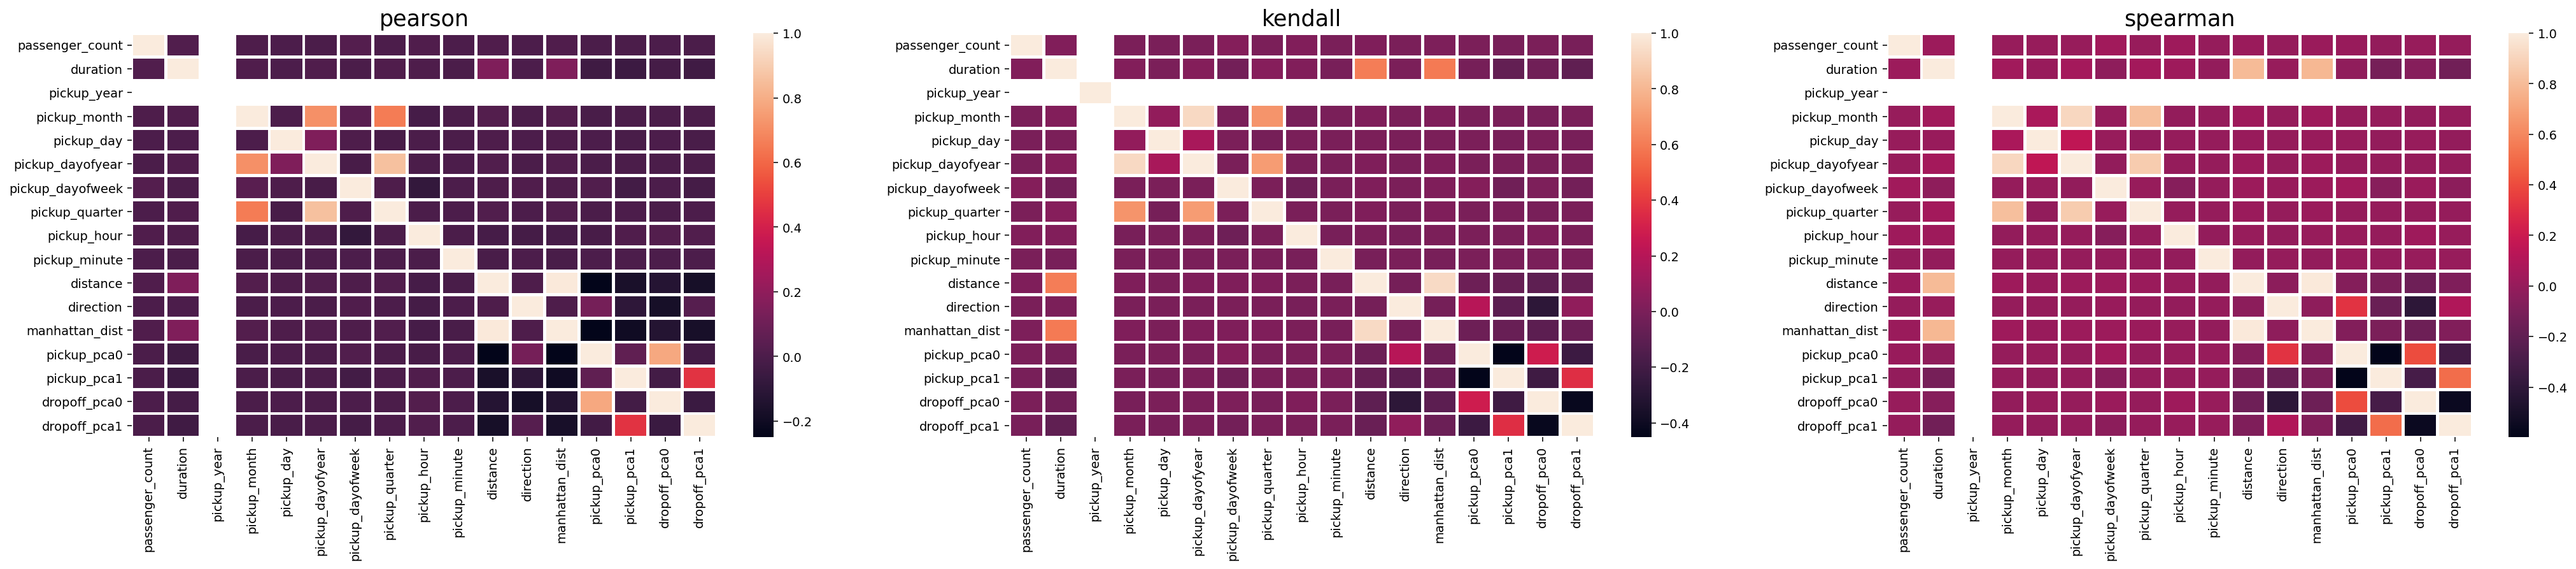

In [43]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)



- Kendall,pearson and spearman shows a close correlation similarities expecially in pattern.
- Too many variable with insignificant correlation many correlation lies in the day of month and time segment
- The distance and the manhattan distance correlates
- Also the duration, distance and manhattan distance

In [44]:
# extracting transaction information of current and previous months
var = []
var.extend(time1)
var.extend(time2)
var.extend(time3)

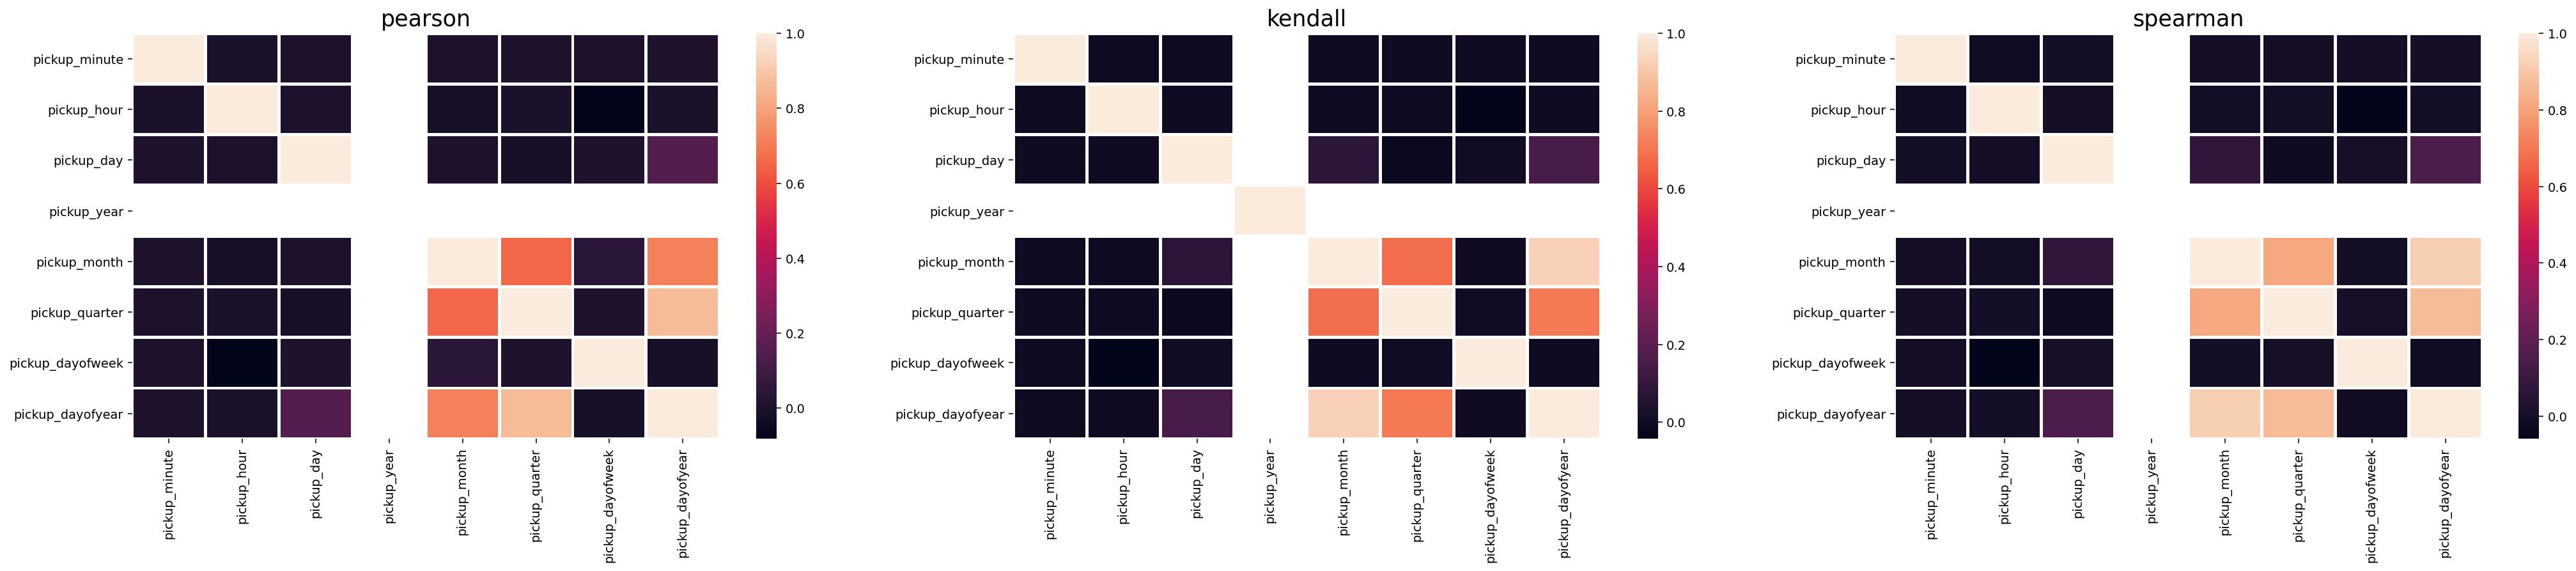

In [45]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

- pickup month andquater show correlation between each other 
- same as pickup quater and year

## Scatter Plot

In [46]:
combined_data.columns

Index(['id', 'vendor_id', 'passenger_count', 'duration', 'pickup_year',
       'pickup_month', 'pickup_day', 'pickup_dayofyear', 'pickup_dayofweek',
       'pickup_quarter', 'pickup_hour', 'pickup_minute', 'distance',
       'direction', 'manhattan_dist', 'pickup_cluster', 'dropoff_cluster',
       'pickup_pca0', 'pickup_pca1', 'dropoff_pca0', 'dropoff_pca1'],
      dtype='object')

In [47]:
# Grouping variables
route  = ['direction', 'manhattan_dist', 'distance','passenger_count','duration']
time1  = ['pickup_minute','pickup_hour','pickup_day','pickup_year','pickup_month', 'pickup_quarter','pickup_dayofweek','pickup_dayofyear']



<Figure size 840x560 with 0 Axes>

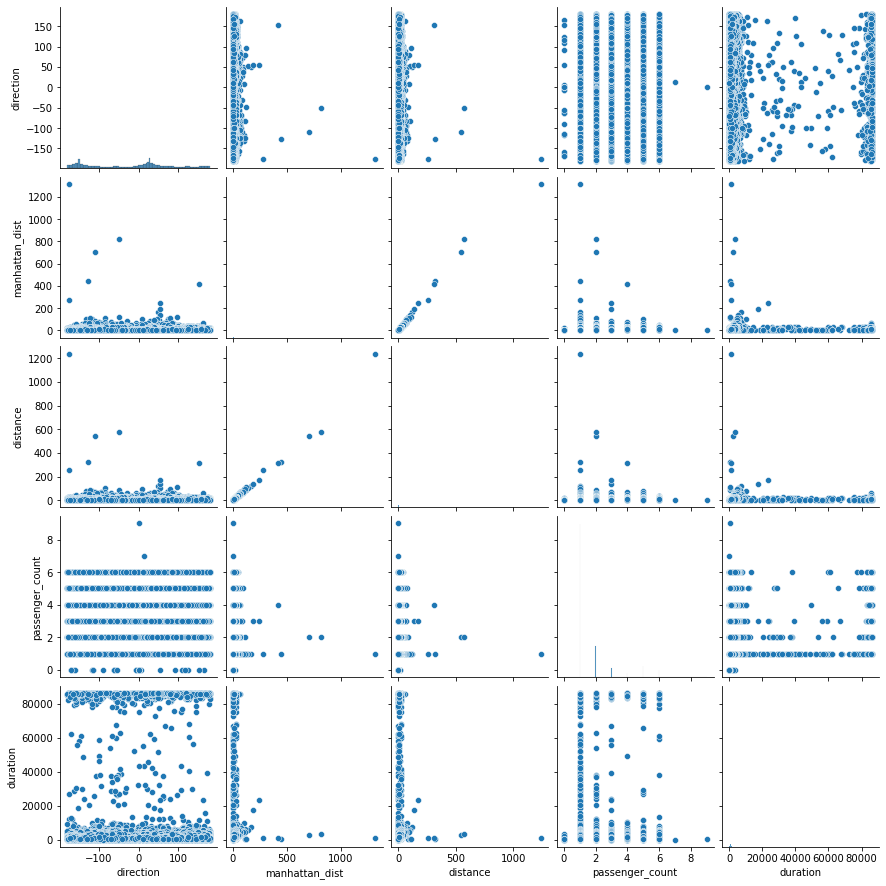

In [48]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[route])

- As mentioned the distances and duration correlates
- The others aren't meangingful as the data does not show lot of correlation

<Figure size 840x560 with 0 Axes>

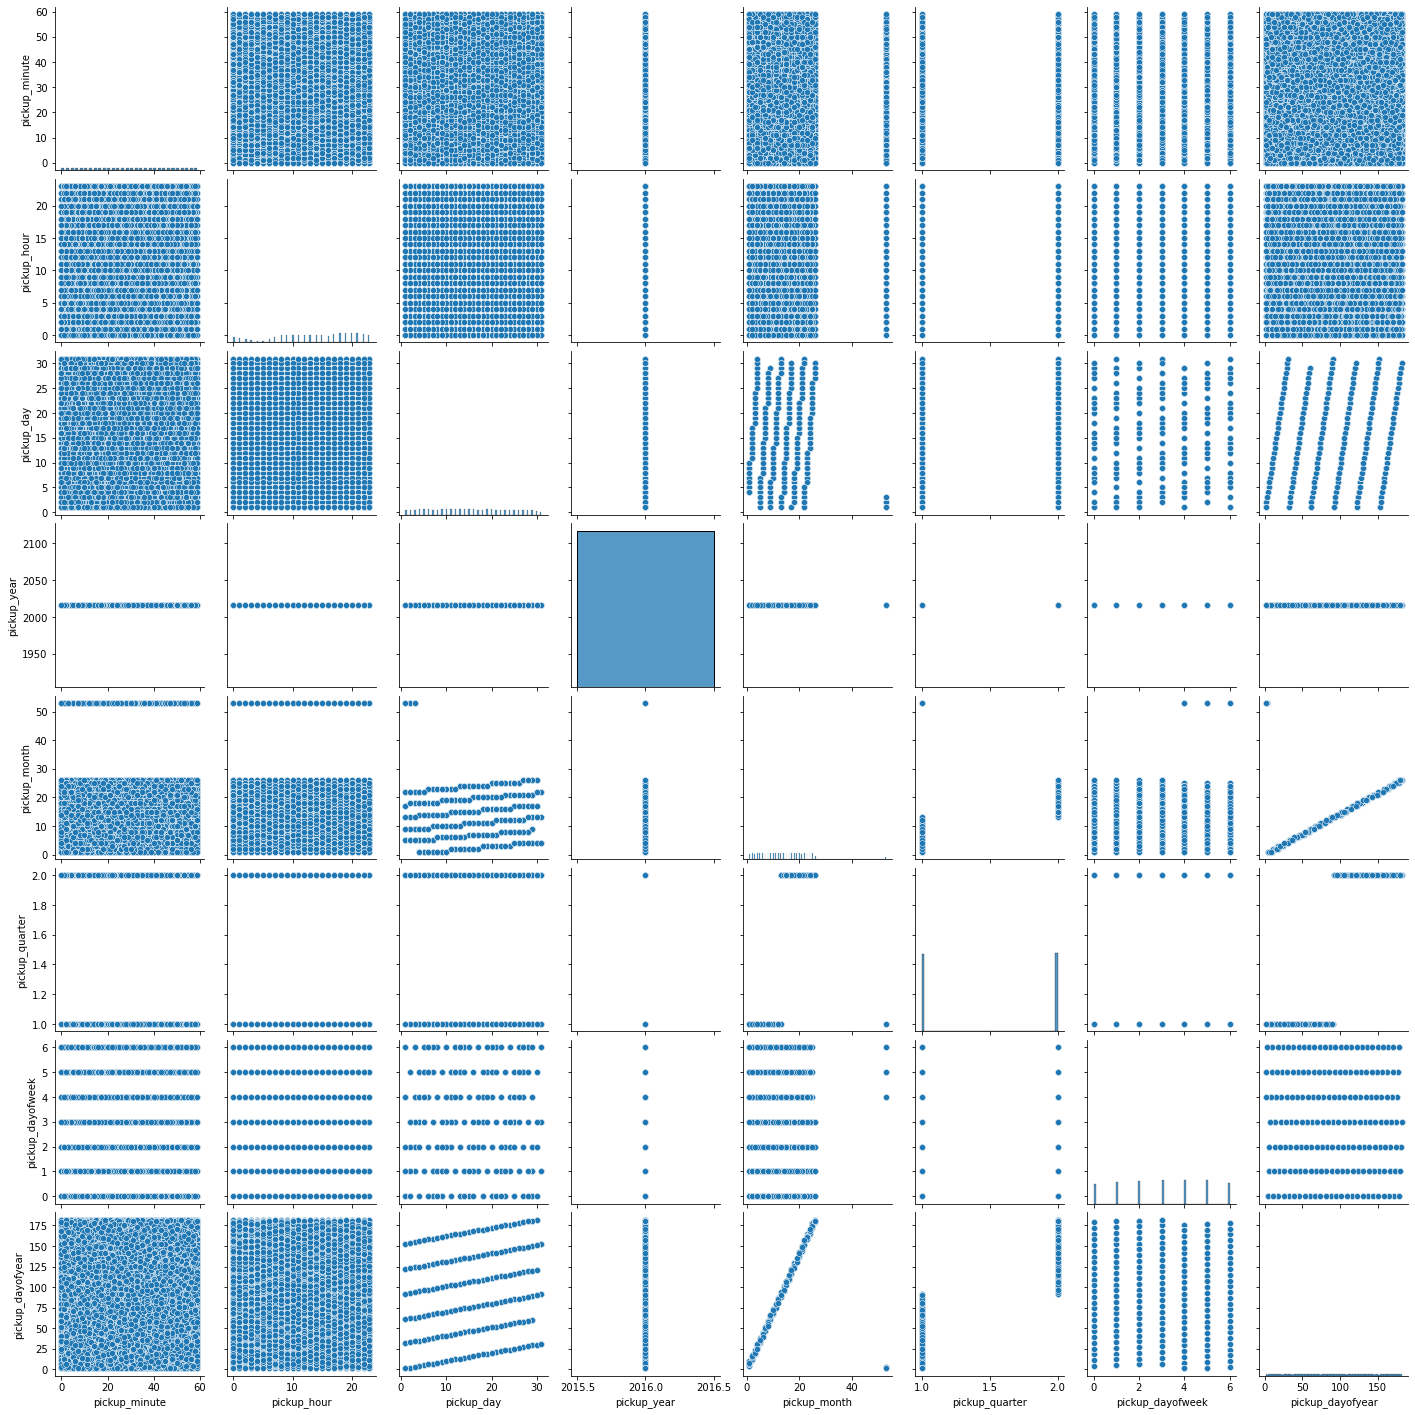

In [49]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[time1])

- As seen this shown a possitive correlation between the dayof year and the pickup_month

## Bivariate : Continous-Categorical

In [50]:

def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
    
    
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
    
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

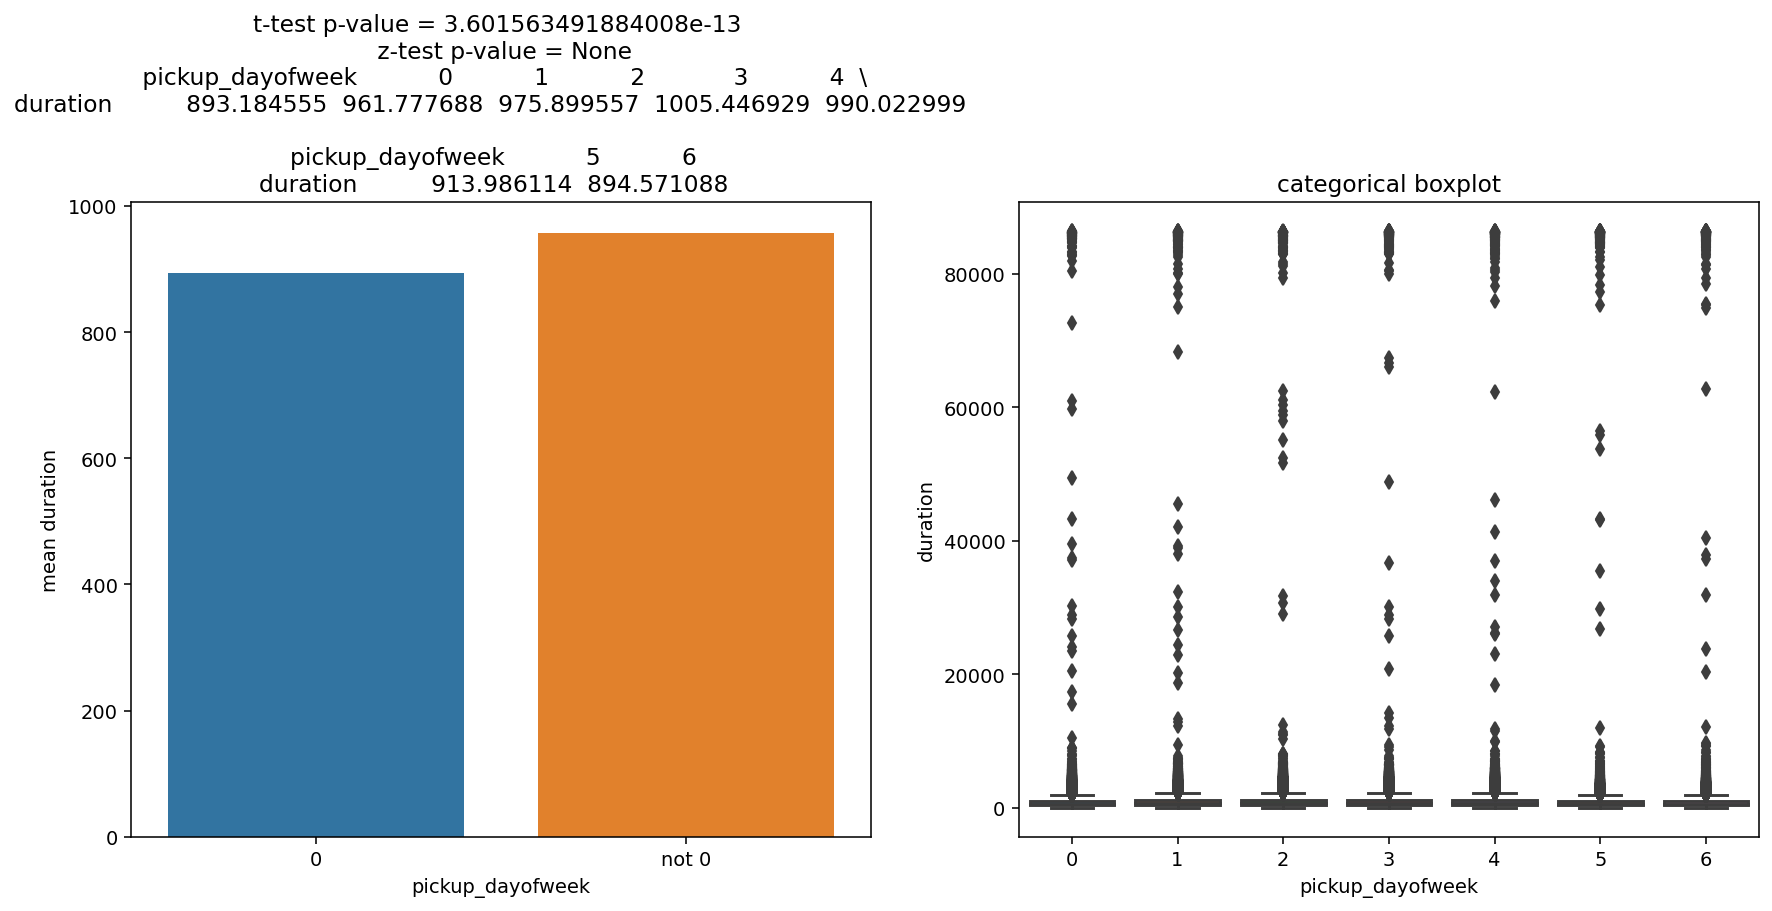

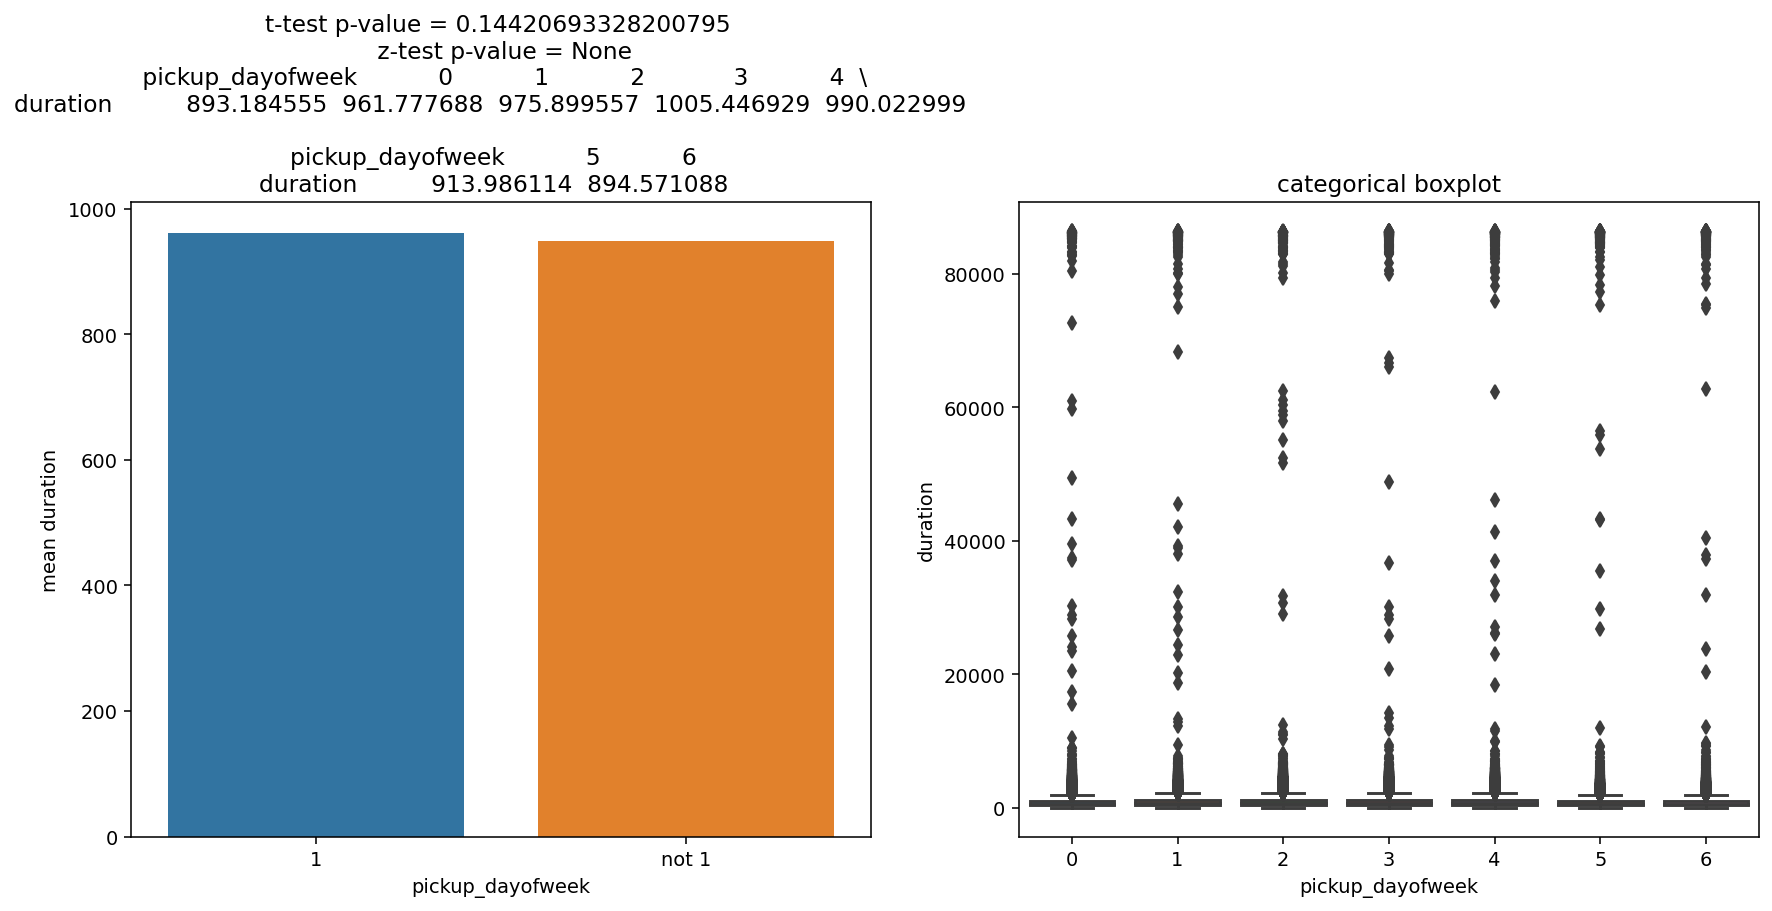

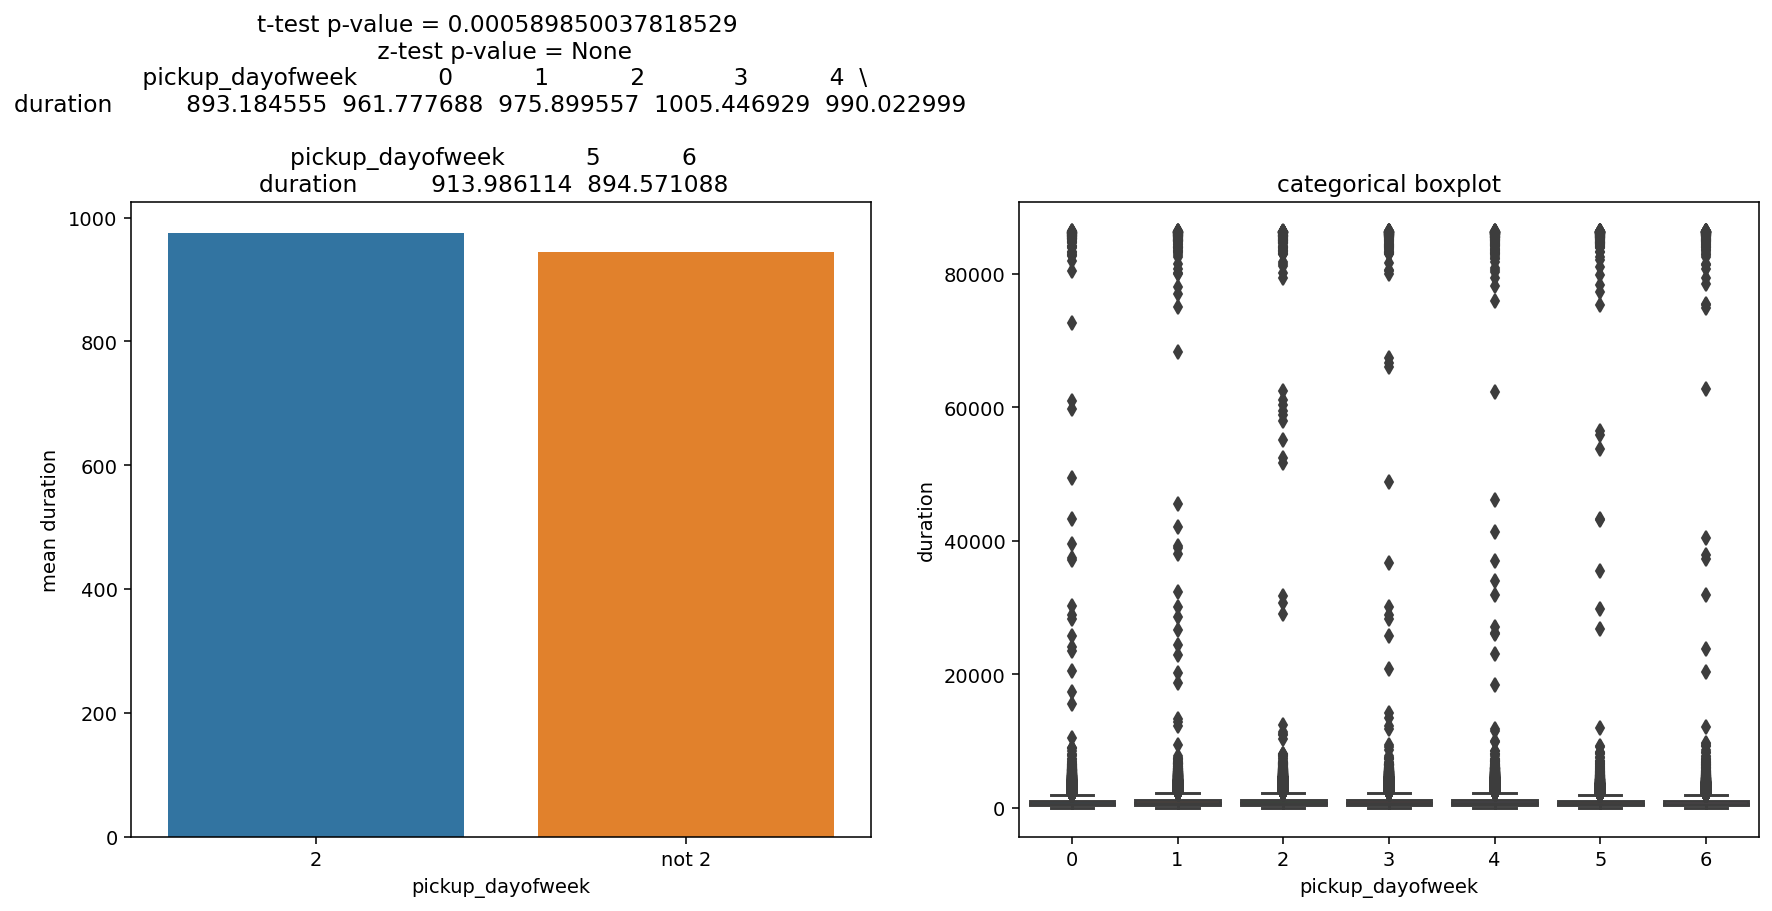

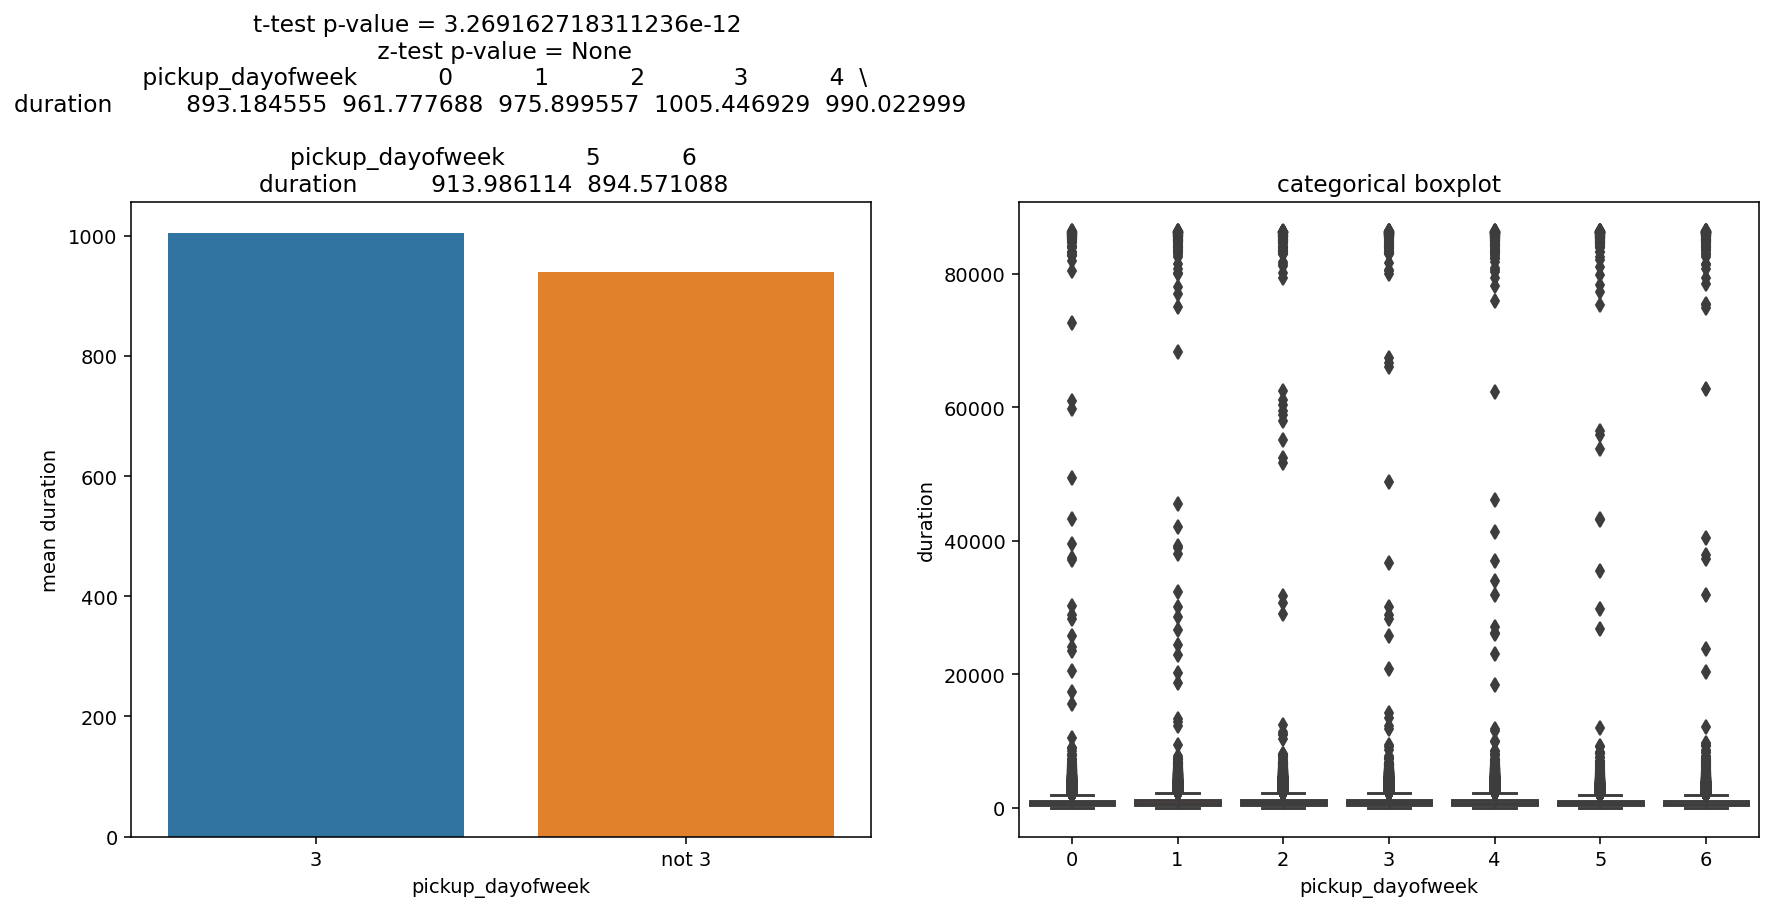

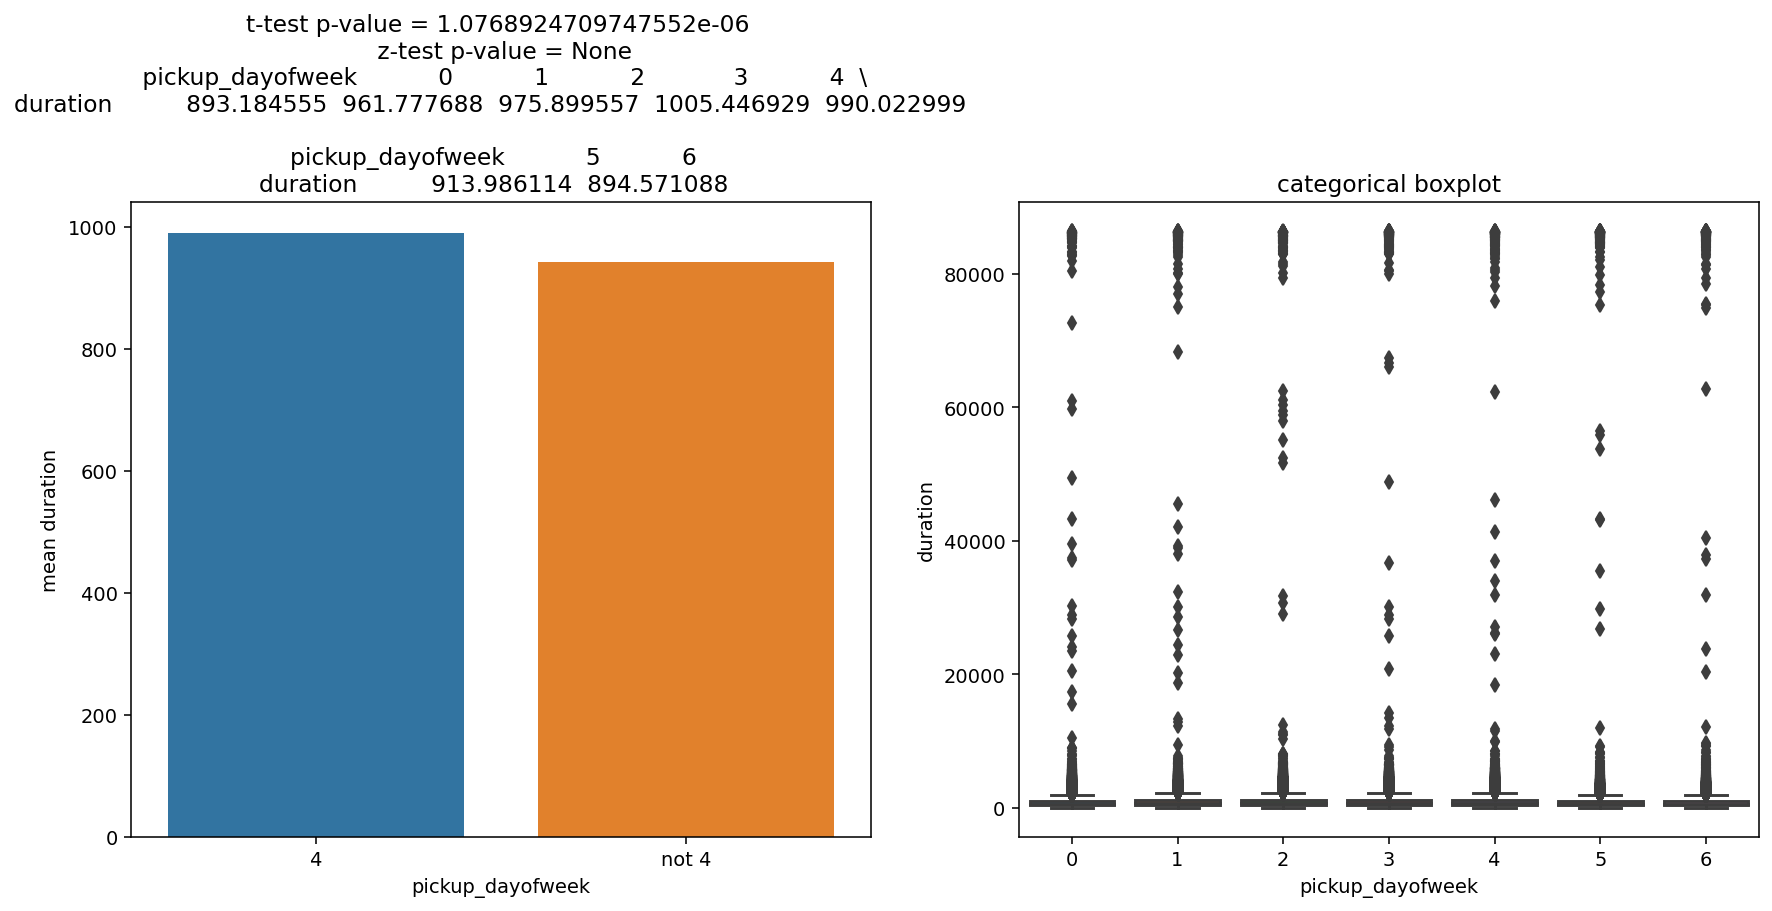

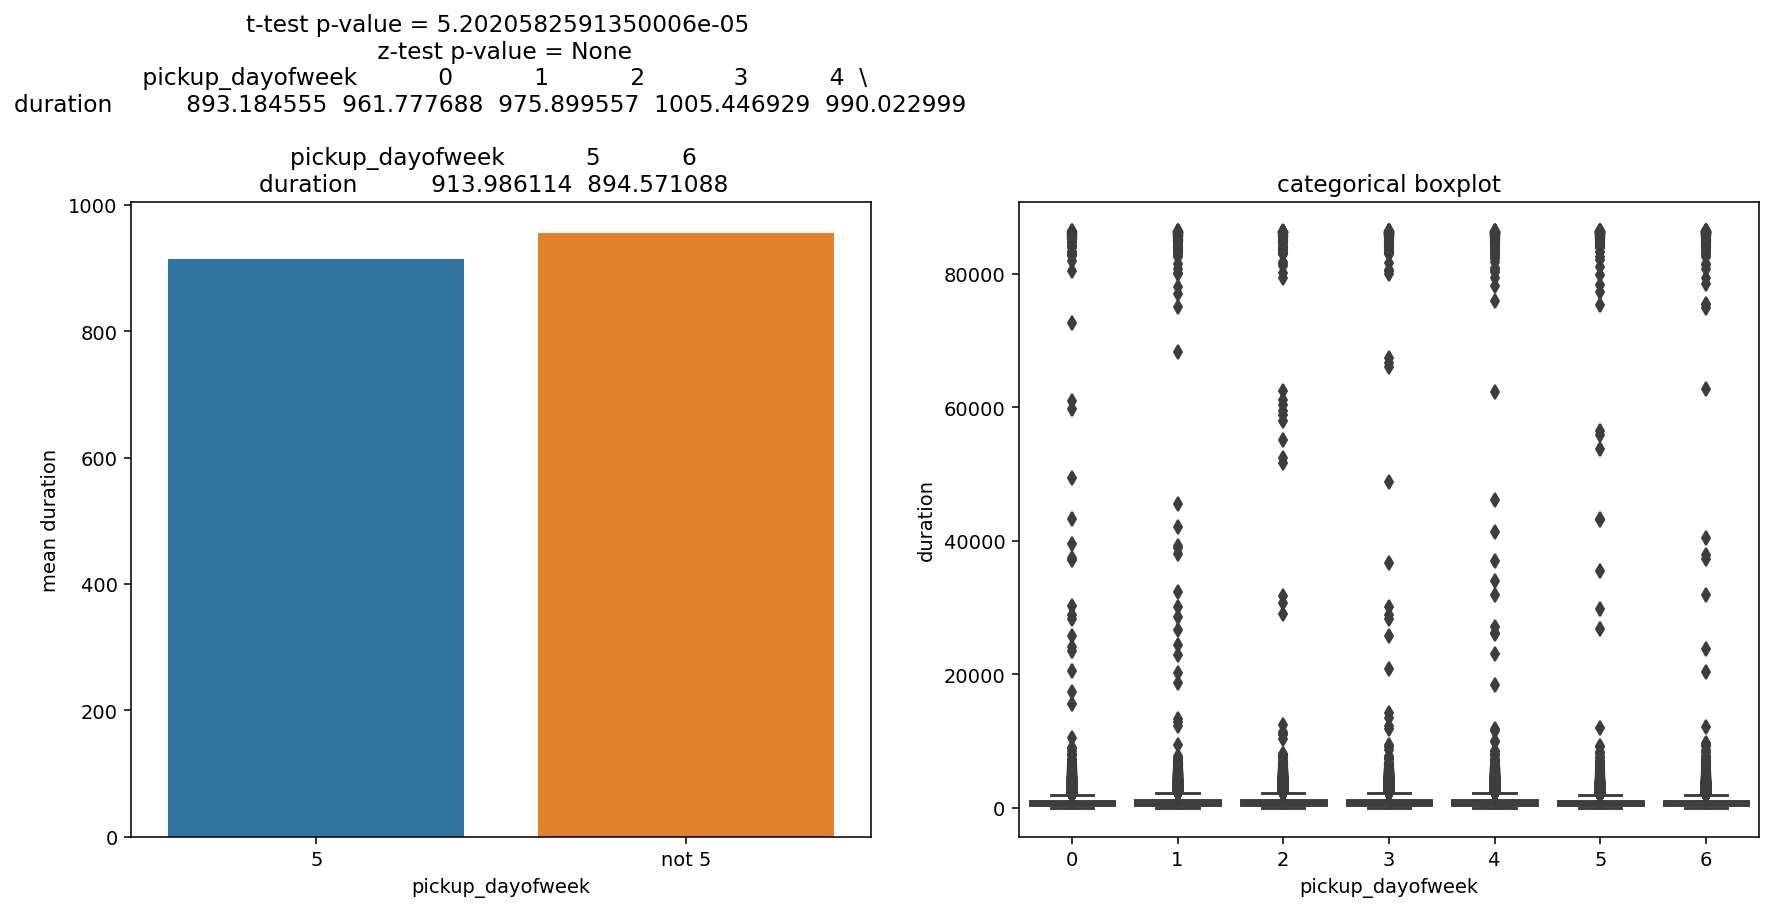

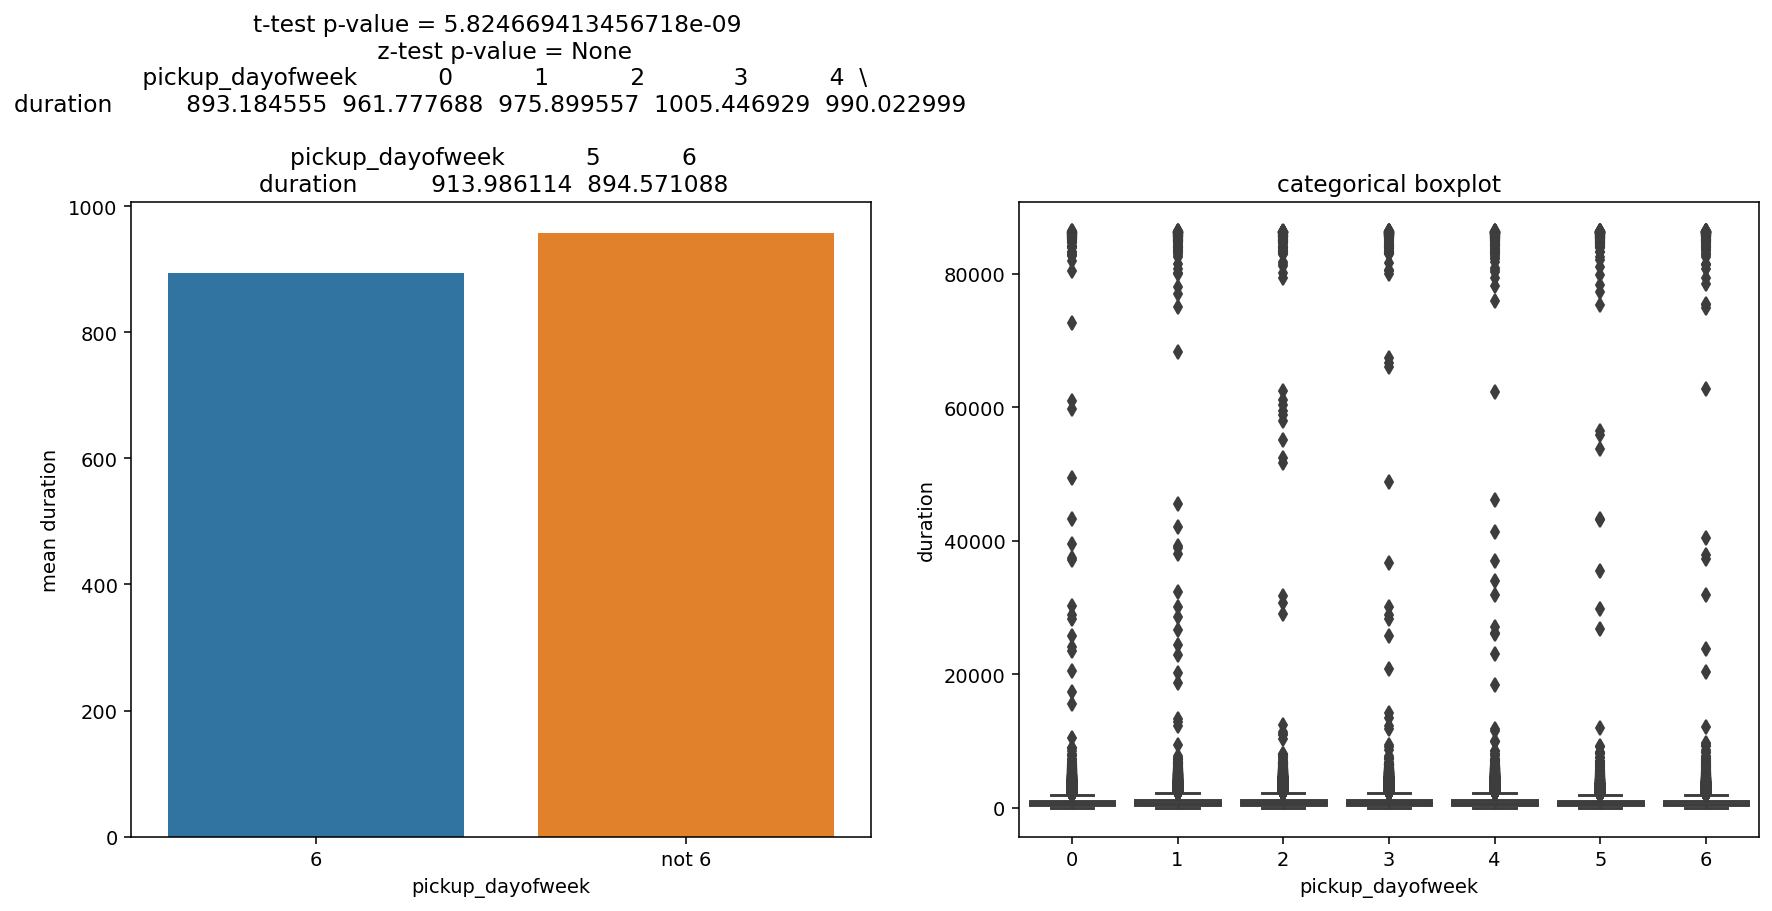

In [51]:
Bivariate_cont_cat(combined_data,'duration','pickup_dayofweek',0)
Bivariate_cont_cat(combined_data,'duration','pickup_dayofweek',1)
Bivariate_cont_cat(combined_data,'duration','pickup_dayofweek',2)
Bivariate_cont_cat(combined_data,'duration','pickup_dayofweek',3)
Bivariate_cont_cat(combined_data,'duration','pickup_dayofweek',4)
Bivariate_cont_cat(combined_data,'duration','pickup_dayofweek',5)
Bivariate_cont_cat(combined_data,'duration','pickup_dayofweek',6)

**Inferences**

We can safely reject the hypothesis all the days except tuesdey. The datza isnt significan
    
* **Pickup_cluster**
   * Boxplot shows presence of outliers on the lower end.
 

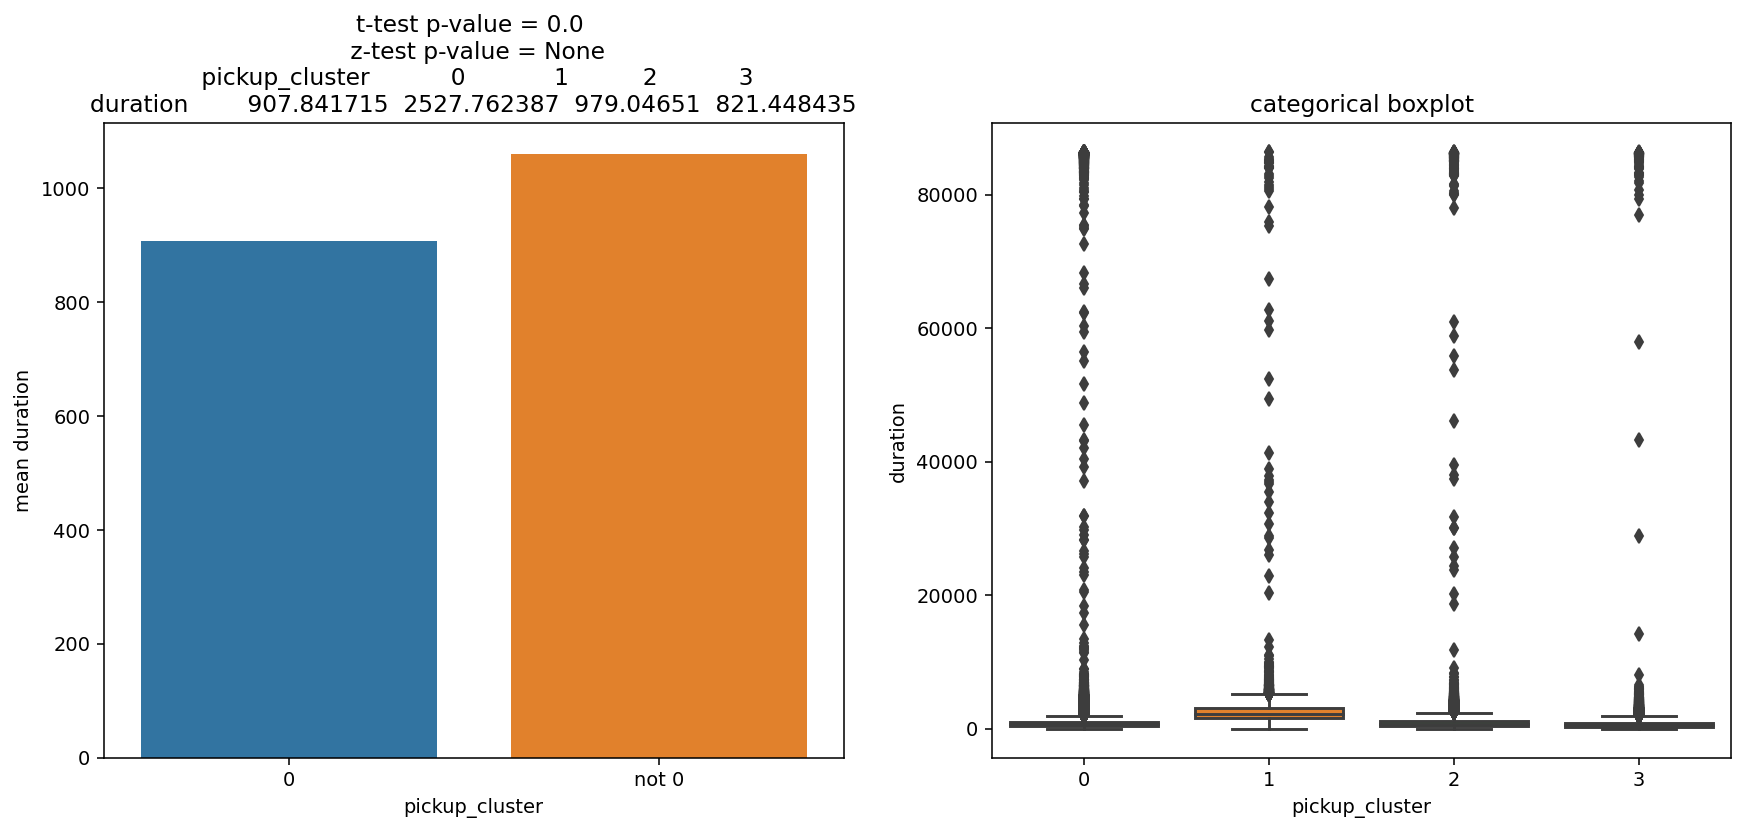

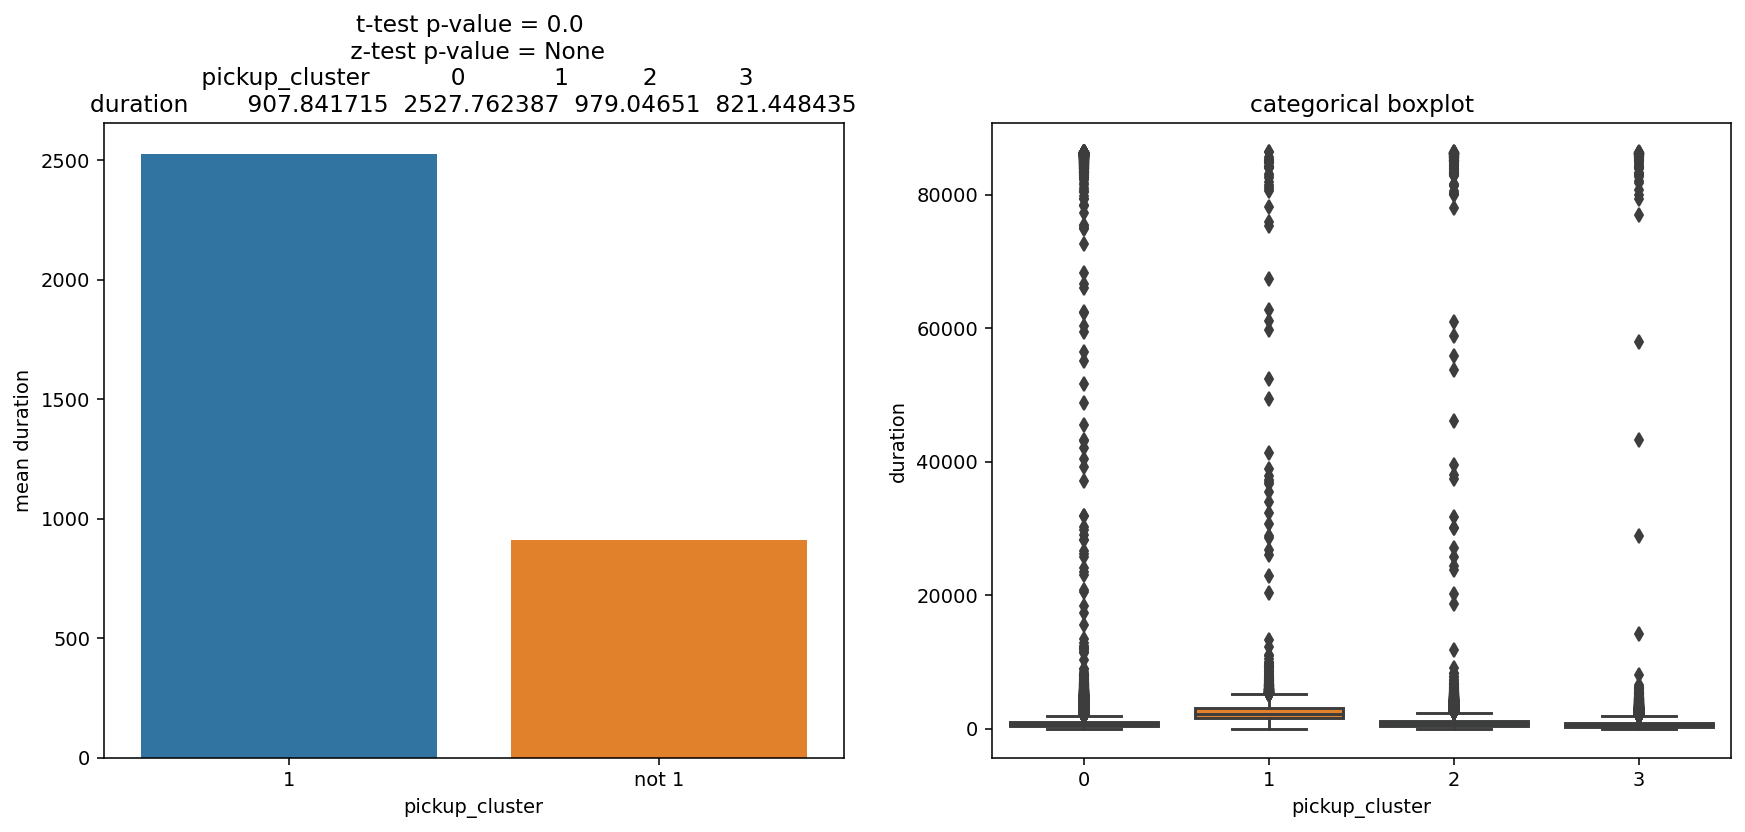

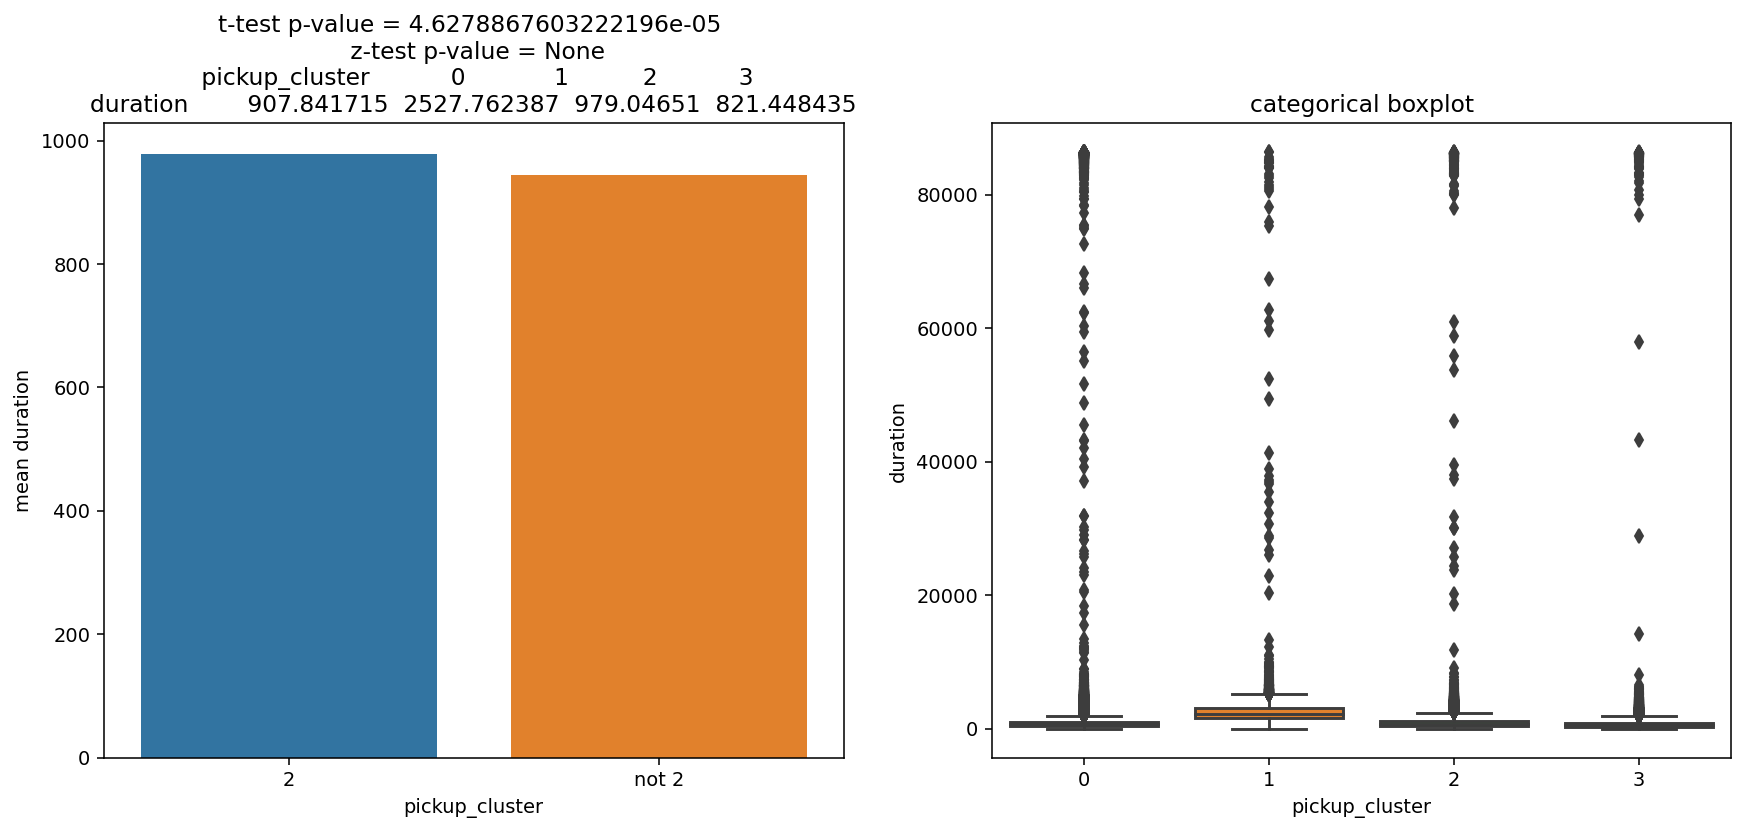

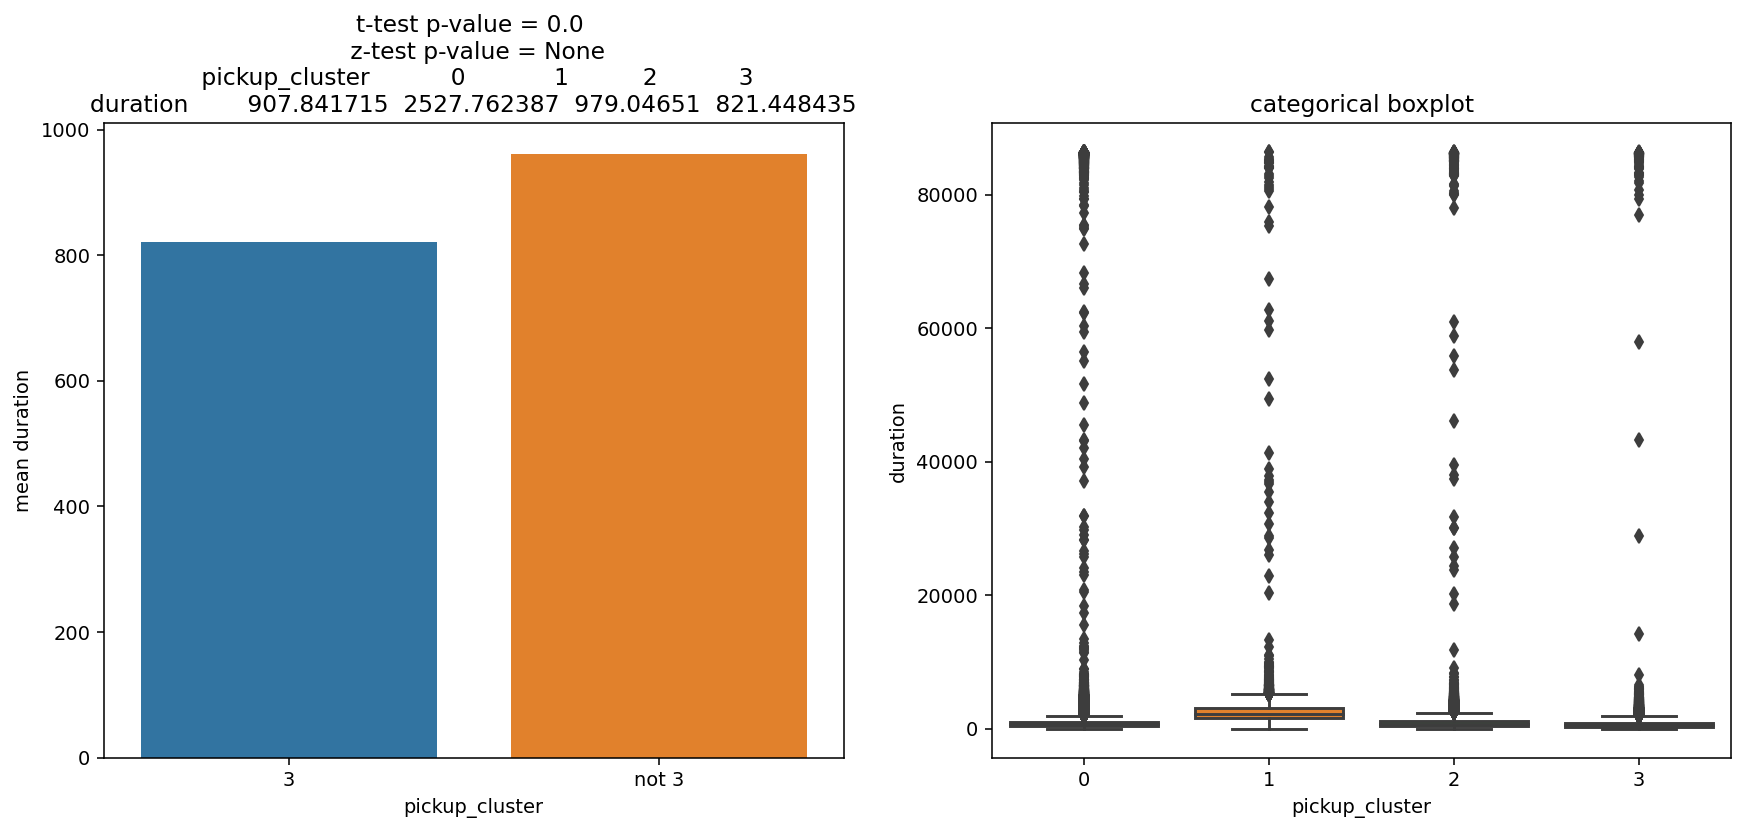

In [52]:
Bivariate_cont_cat(combined_data, 'duration', 'pickup_cluster', 0)
Bivariate_cont_cat(combined_data, 'duration', 'pickup_cluster', 1)
Bivariate_cont_cat(combined_data, 'duration', 'pickup_cluster', 2)
Bivariate_cont_cat(combined_data, 'duration', 'pickup_cluster', 3)

**Inferences**

We can safely accept the hypothesis that the clusters affect the duration
* **Duration**
    * On average taxies picked up from **cluster 0** will last **870 sec**
    * On average taxies picked up from **cluster 1** will last a little above**800 sec**
    * On average taxies picked up from **cluster 2** will last a little above**1200 sec**
    * On average taxies picked up from **cluster 3** will last **2500 sec**
    
* **Pickup_cluster**
   * Boxplot shows presence of outliers on the lower end.
 


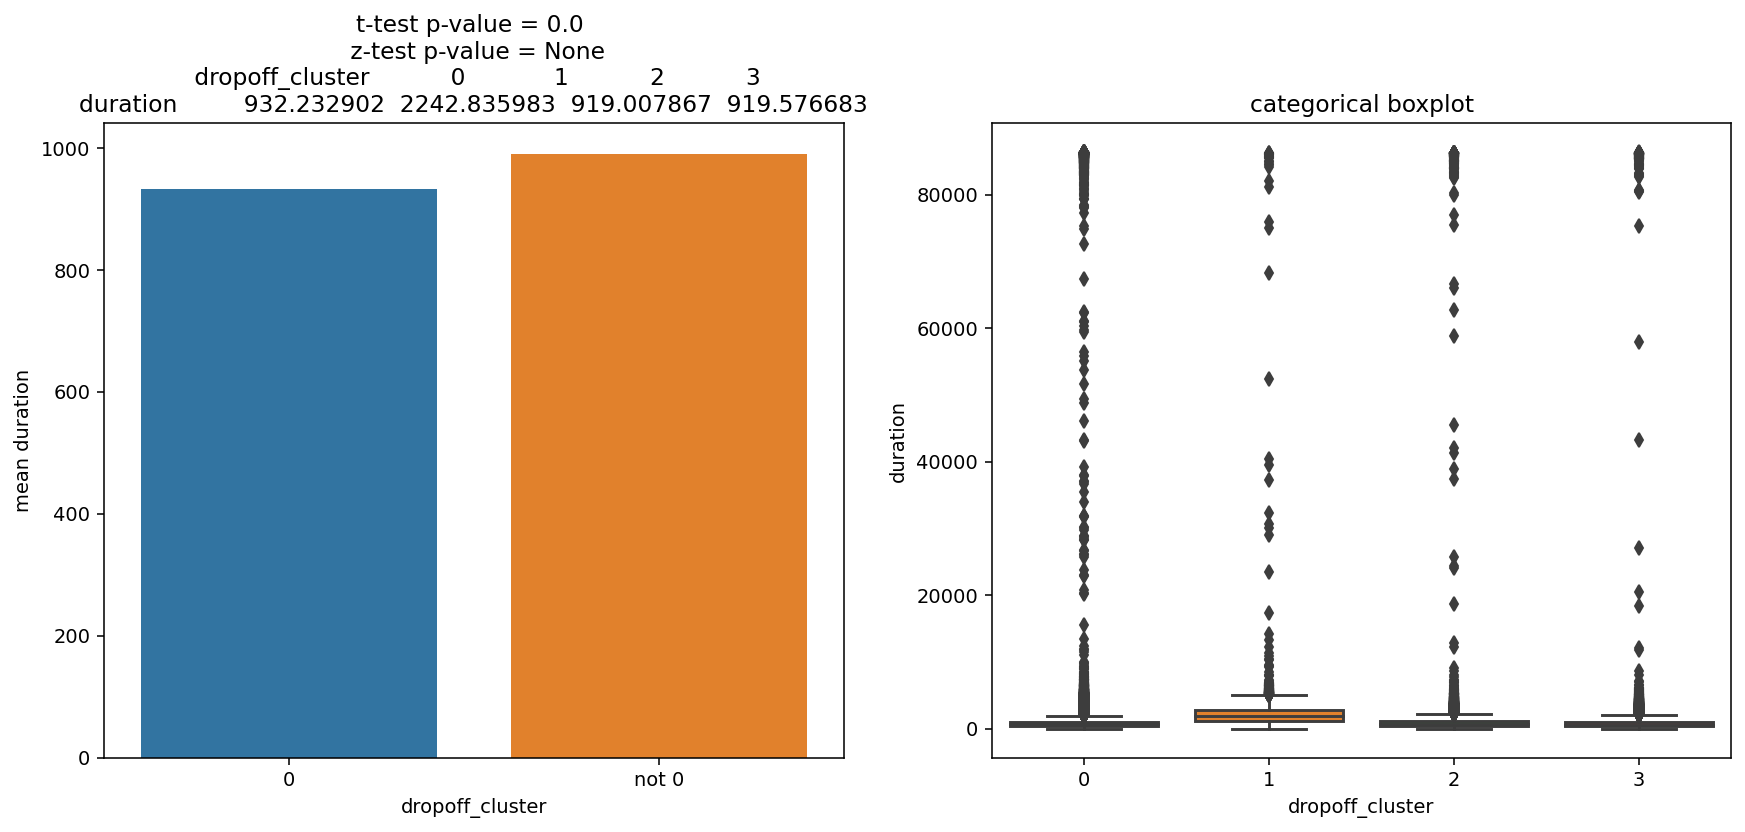

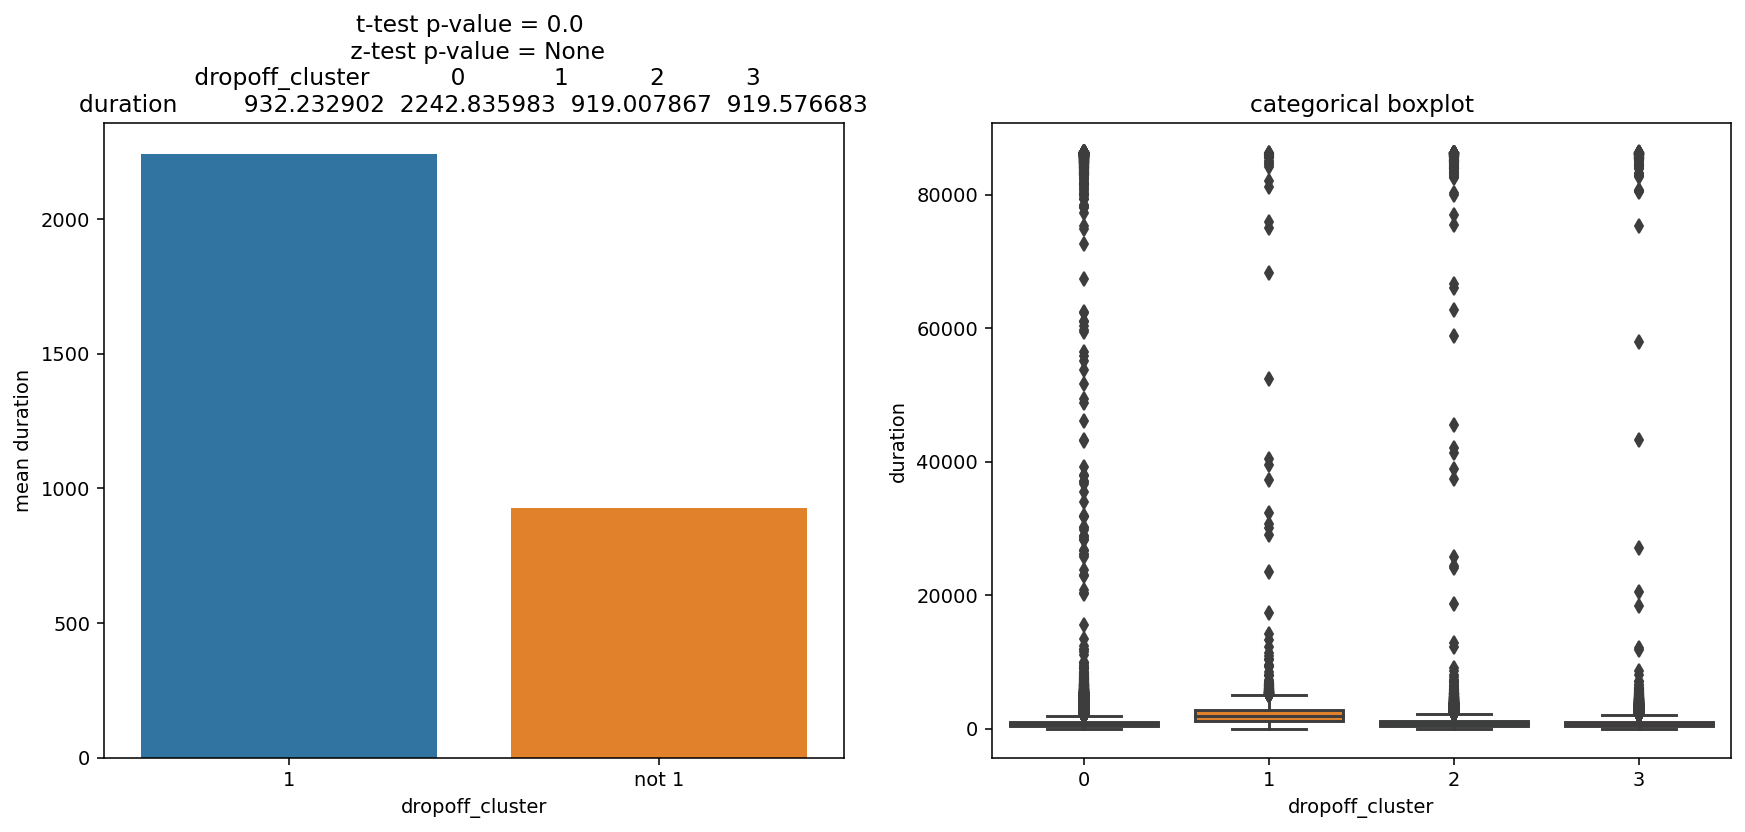

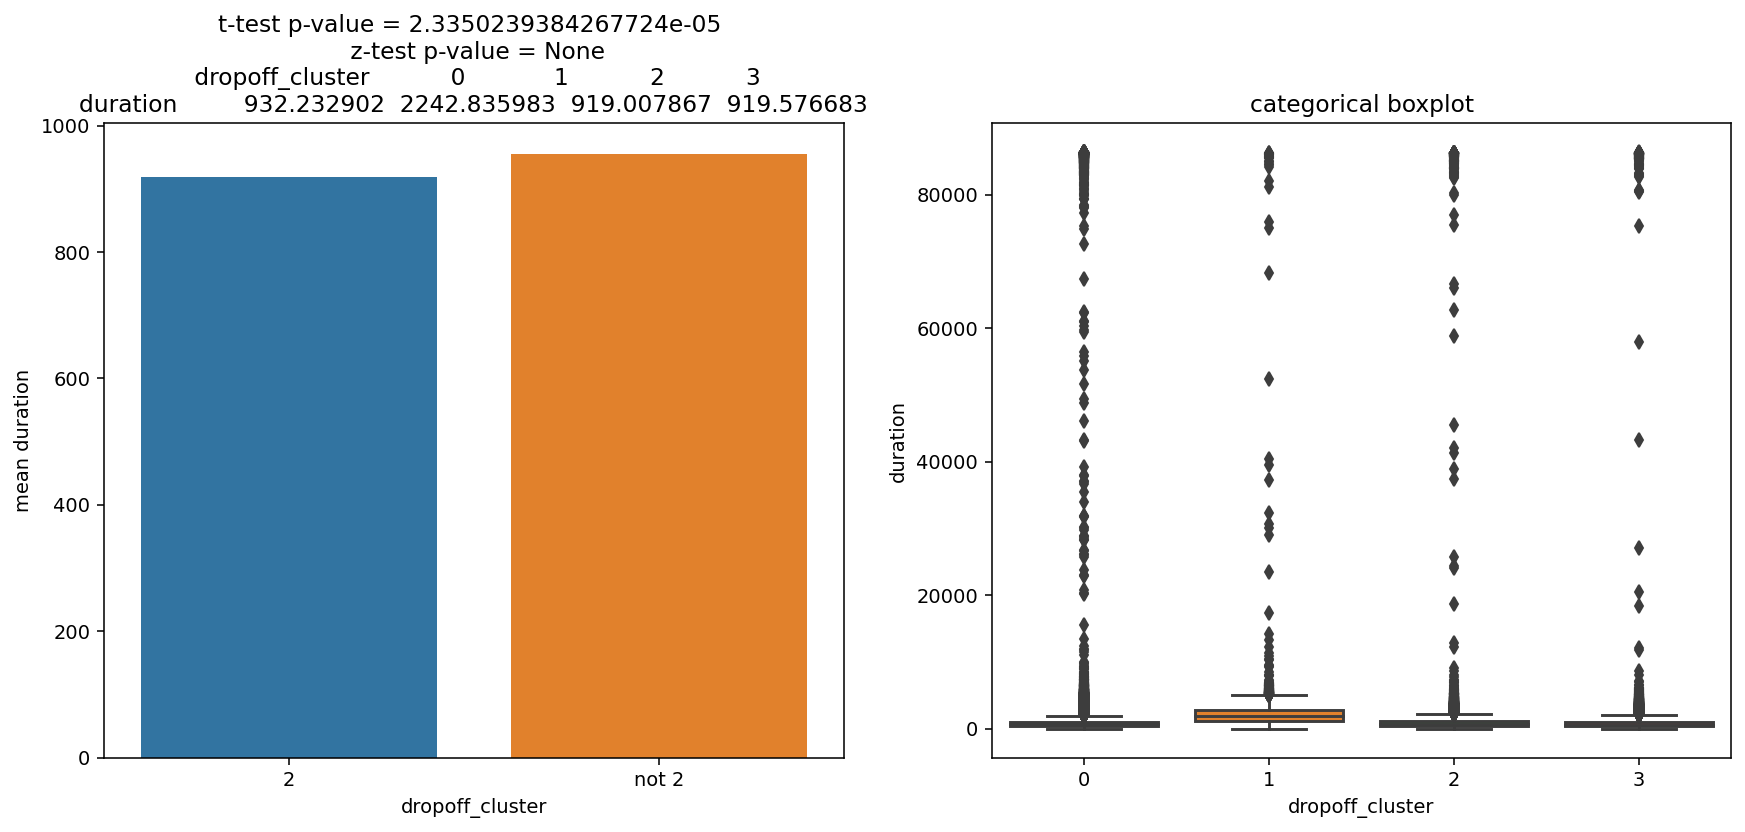

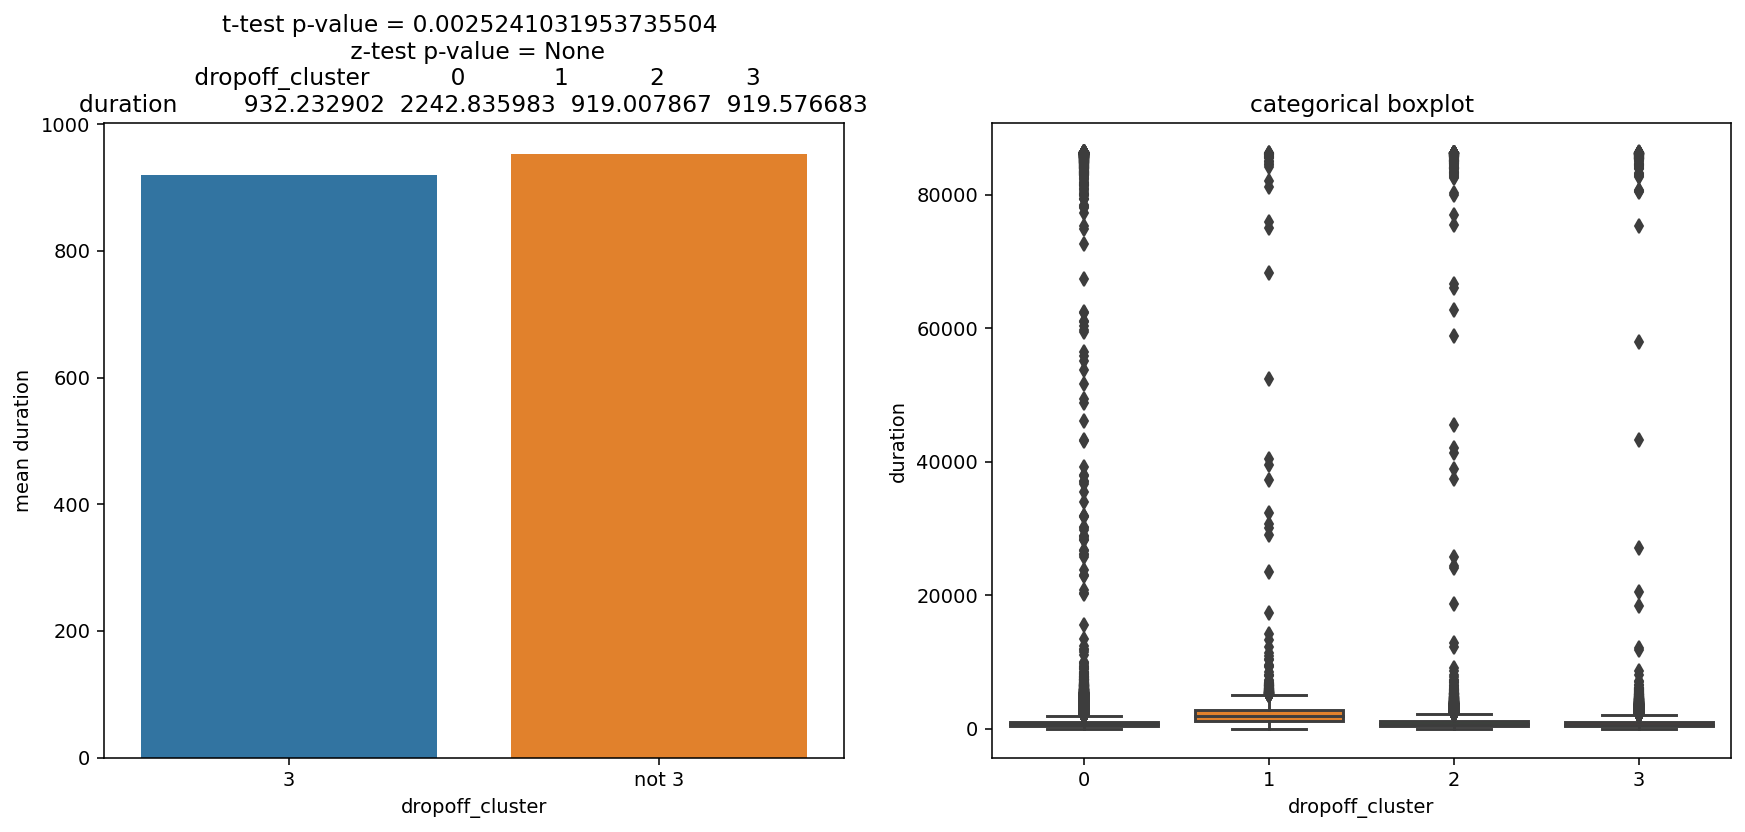

In [53]:
Bivariate_cont_cat(combined_data, 'duration', 'dropoff_cluster', 0)
Bivariate_cont_cat(combined_data, 'duration', 'dropoff_cluster', 1)
Bivariate_cont_cat(combined_data, 'duration', 'dropoff_cluster', 2)
Bivariate_cont_cat(combined_data, 'duration', 'dropoff_cluster', 3)

**Inferences**
We can safely accept the hypothesis that the dropoff clusters affect the duration
* **Duration**
    * On average taxies dropped off from **cluster 0** will last **870 sec**
    * On average taxies dropped off from **cluster 1** will last a little above**800 sec**
    * On average taxies dropped off from **cluster 2** will last a almost **1200 sec**
    * On average taxies dropped off from **cluster 3** will last **2500 sec**
    
* **Dropoff_cluster**
   * Boxplot shows presence of outliers on the lower end.

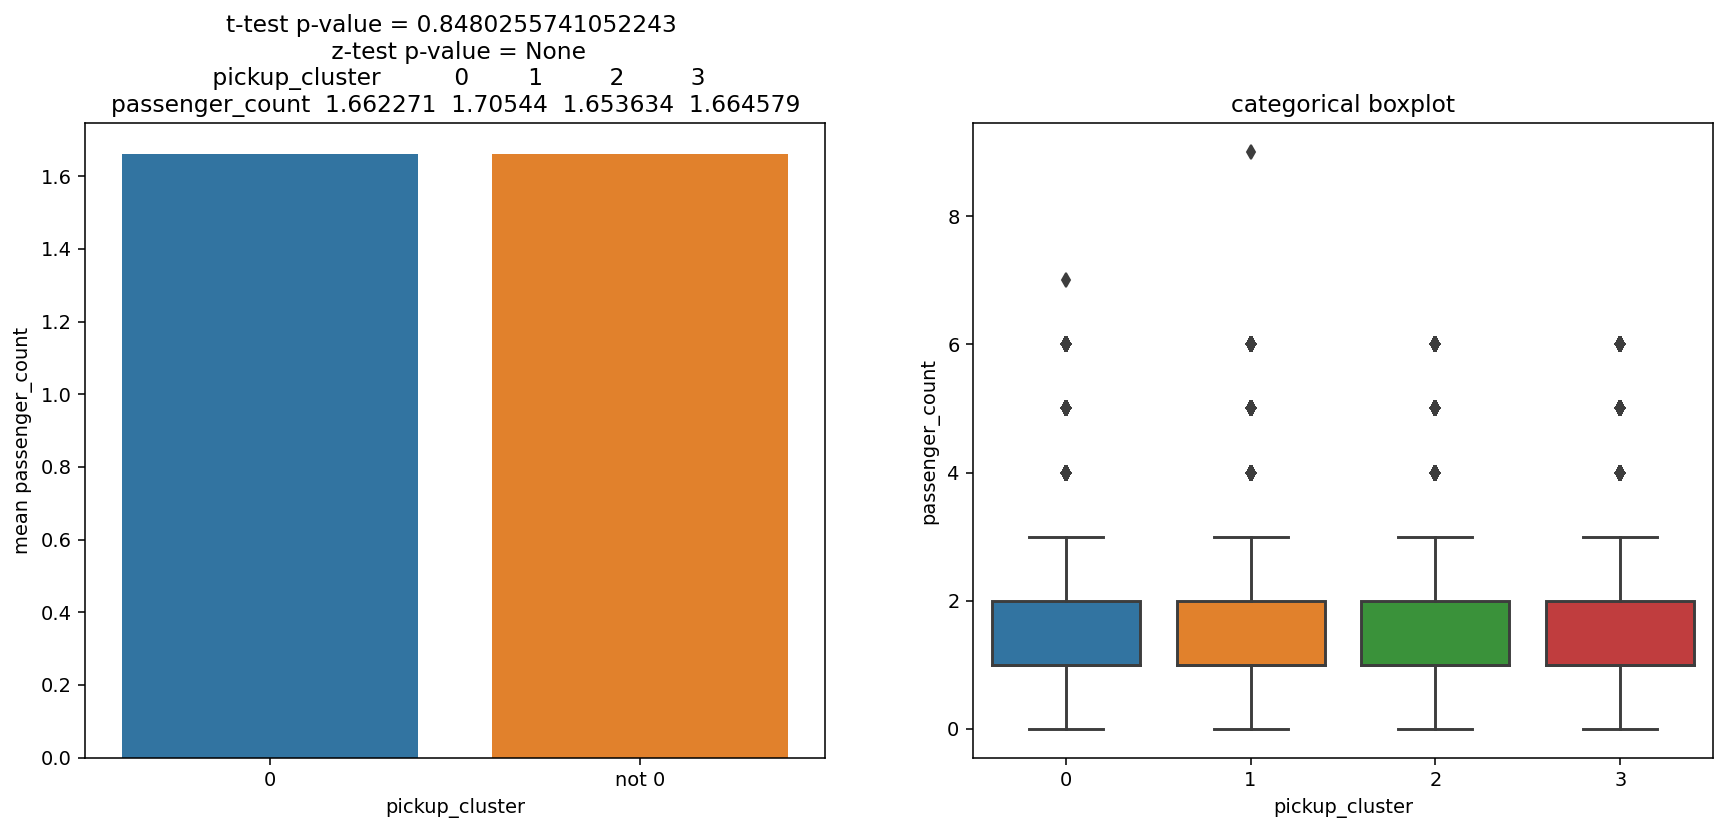

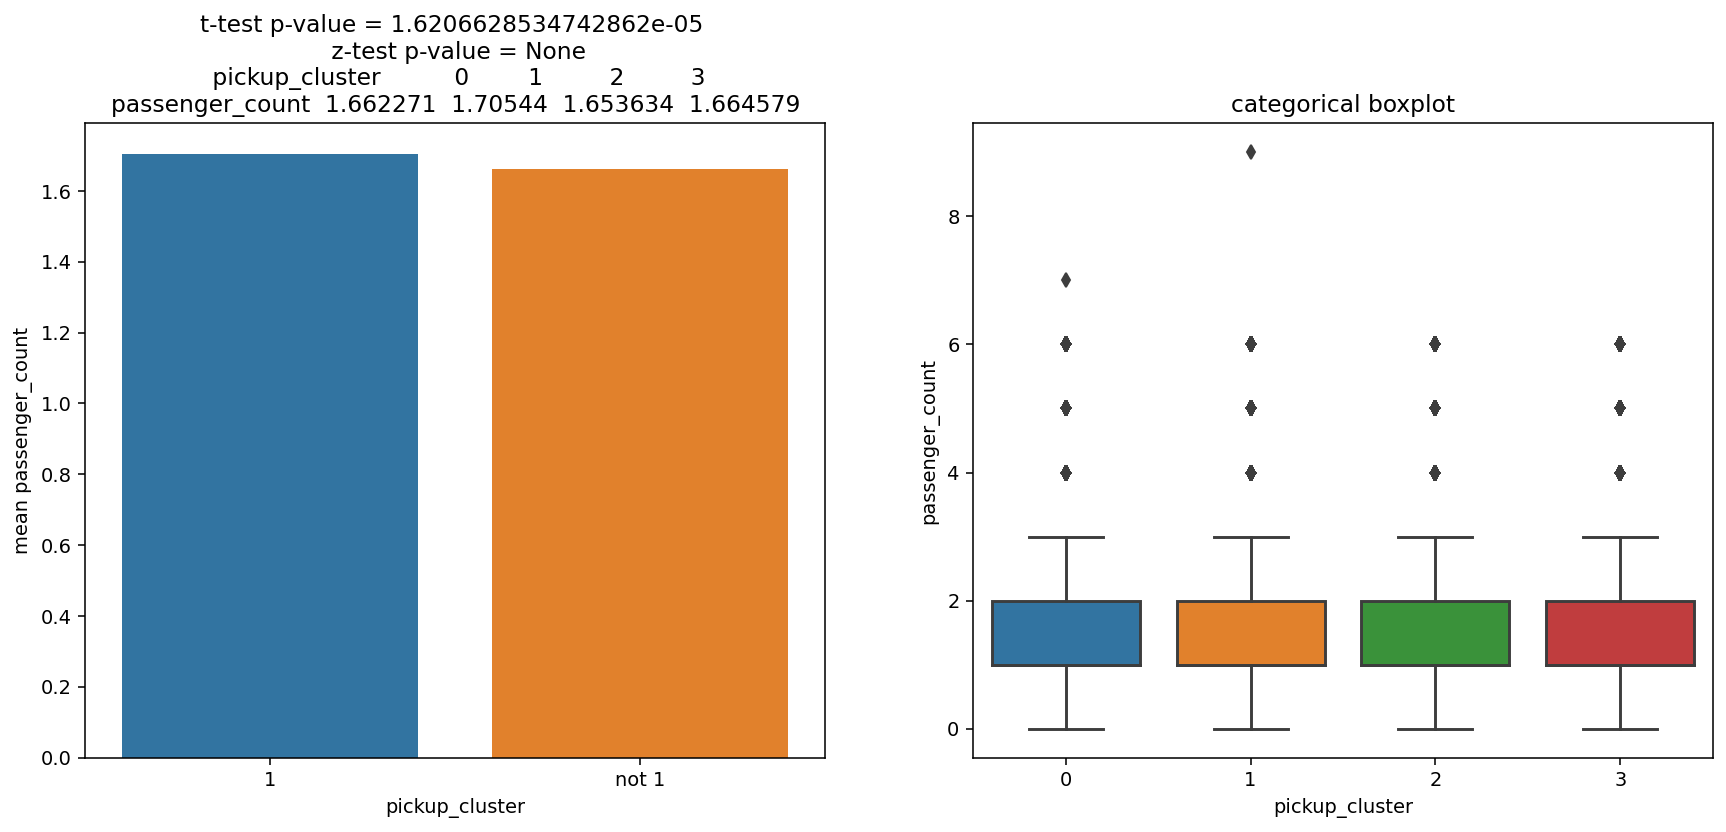

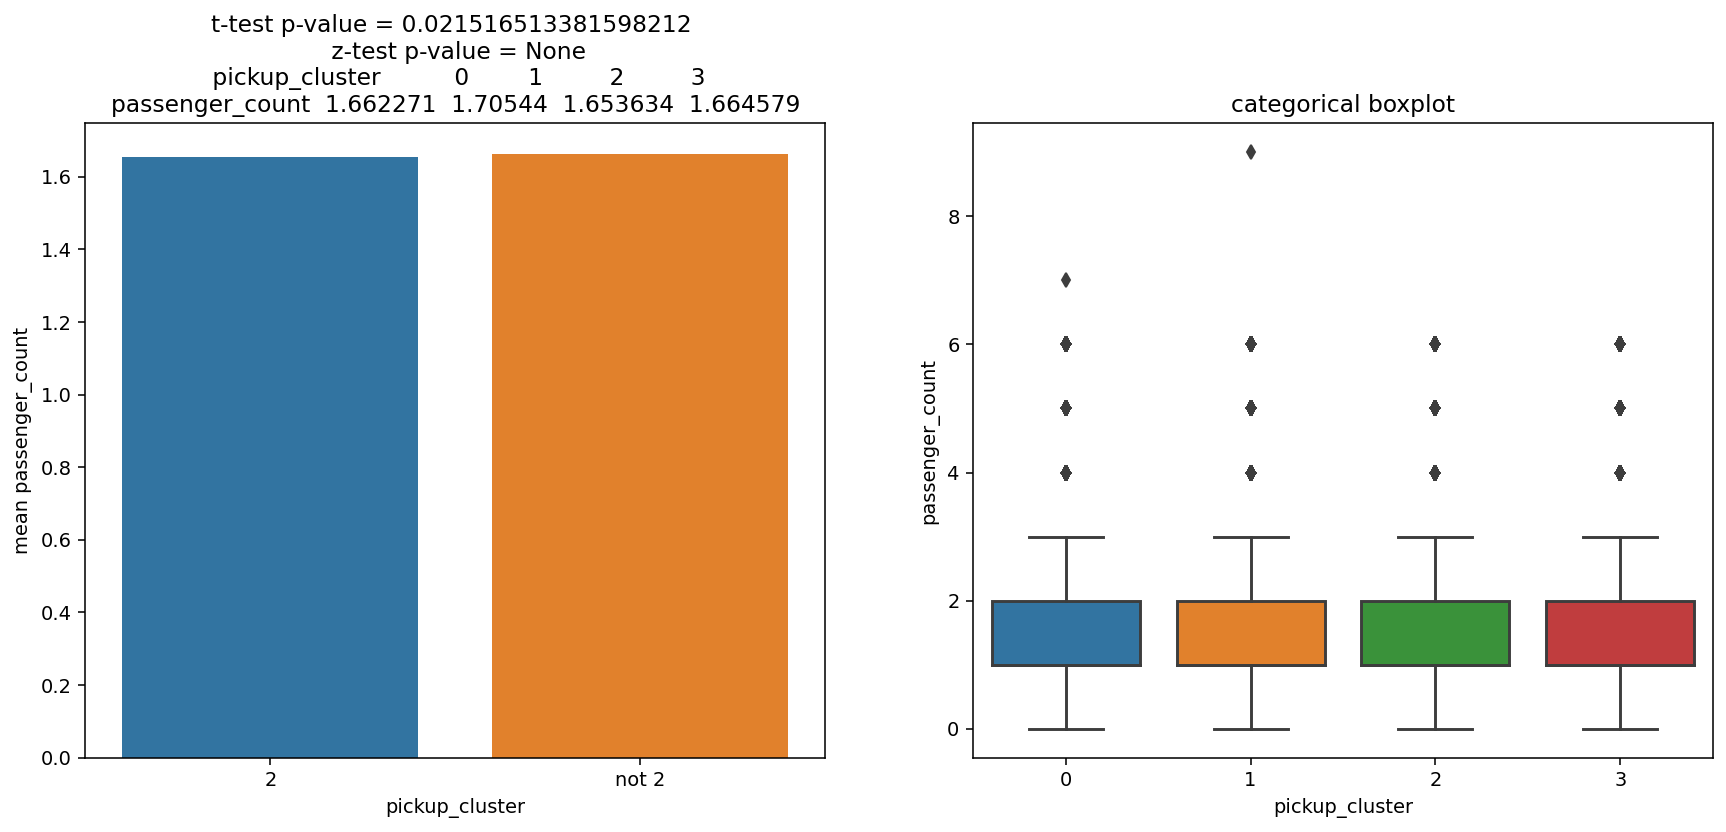

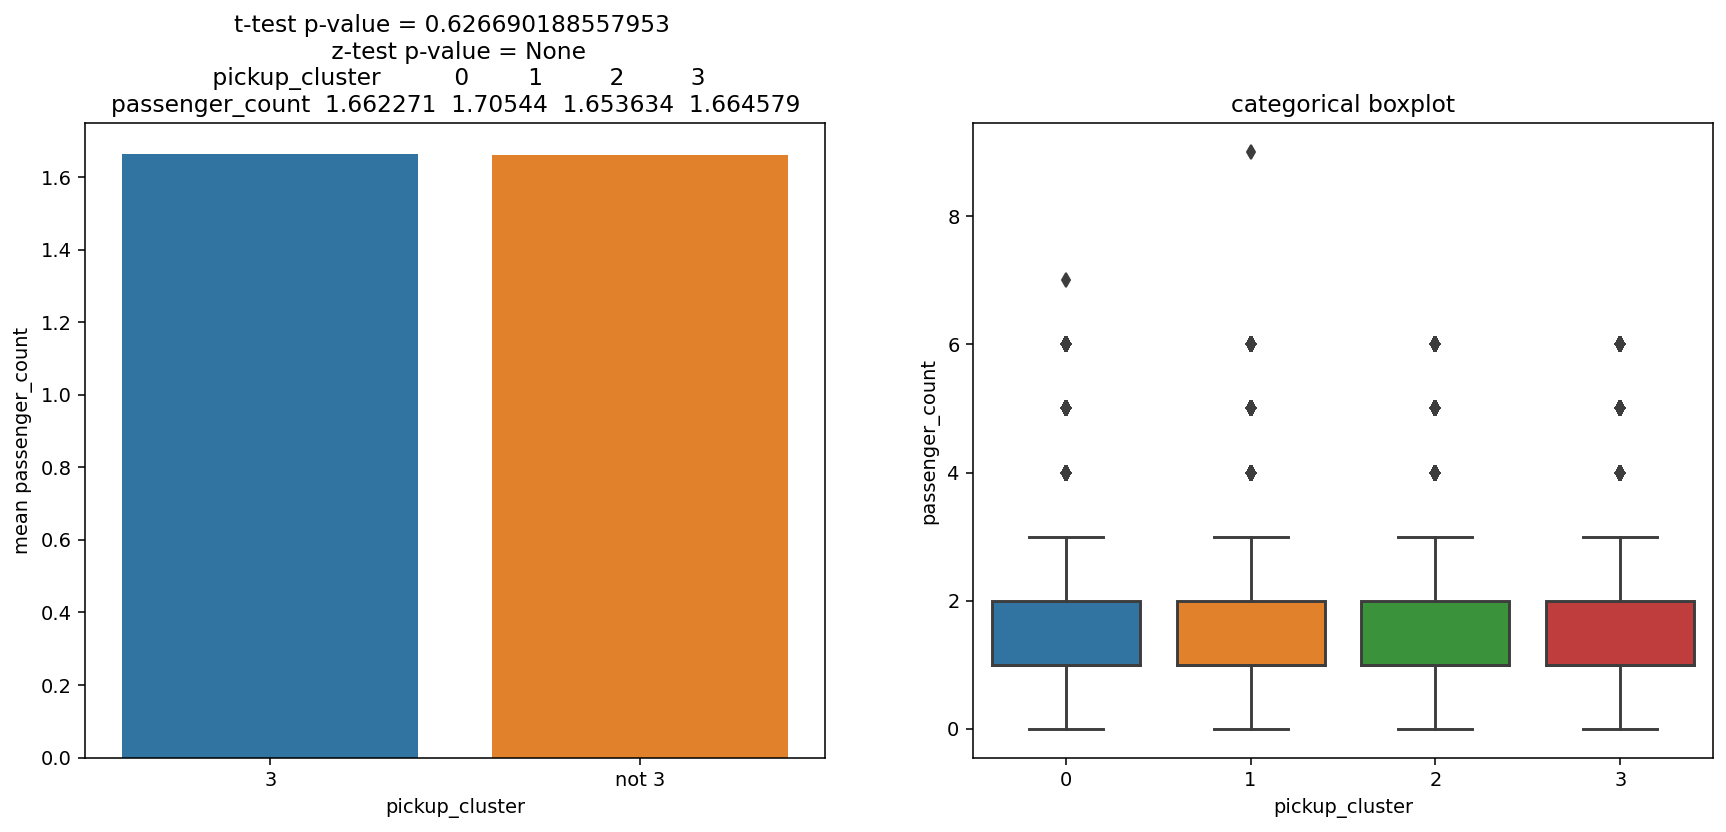

In [54]:
Bivariate_cont_cat(combined_data, 'passenger_count', 'pickup_cluster', 0)
Bivariate_cont_cat(combined_data, 'passenger_count', 'pickup_cluster', 1)
Bivariate_cont_cat(combined_data, 'passenger_count', 'pickup_cluster', 2)
Bivariate_cont_cat(combined_data, 'passenger_count', 'pickup_cluster', 3)

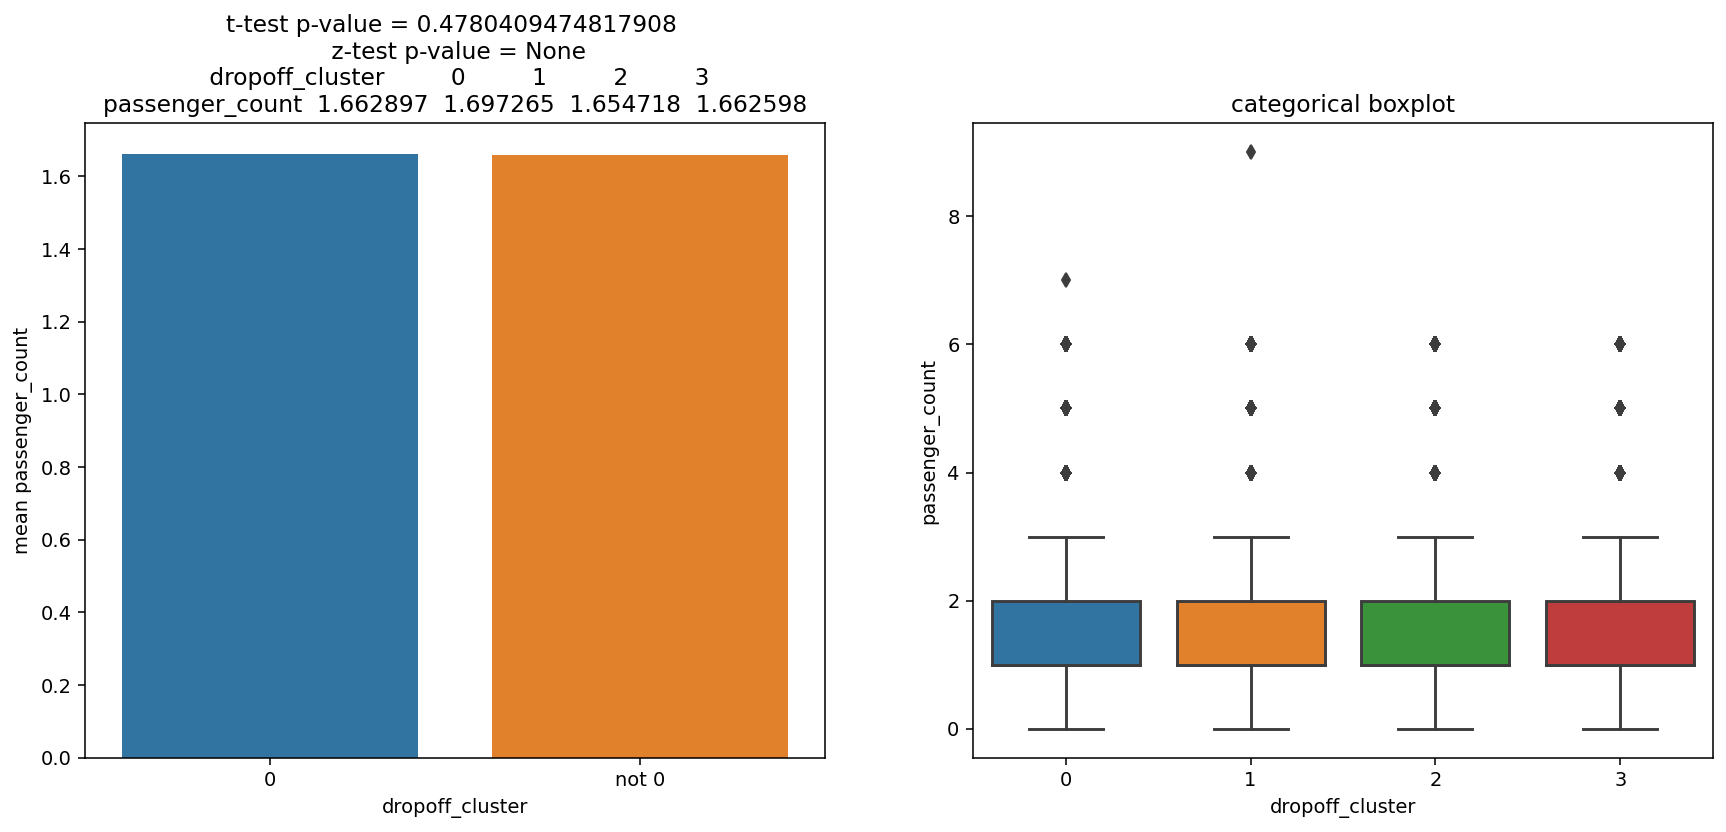

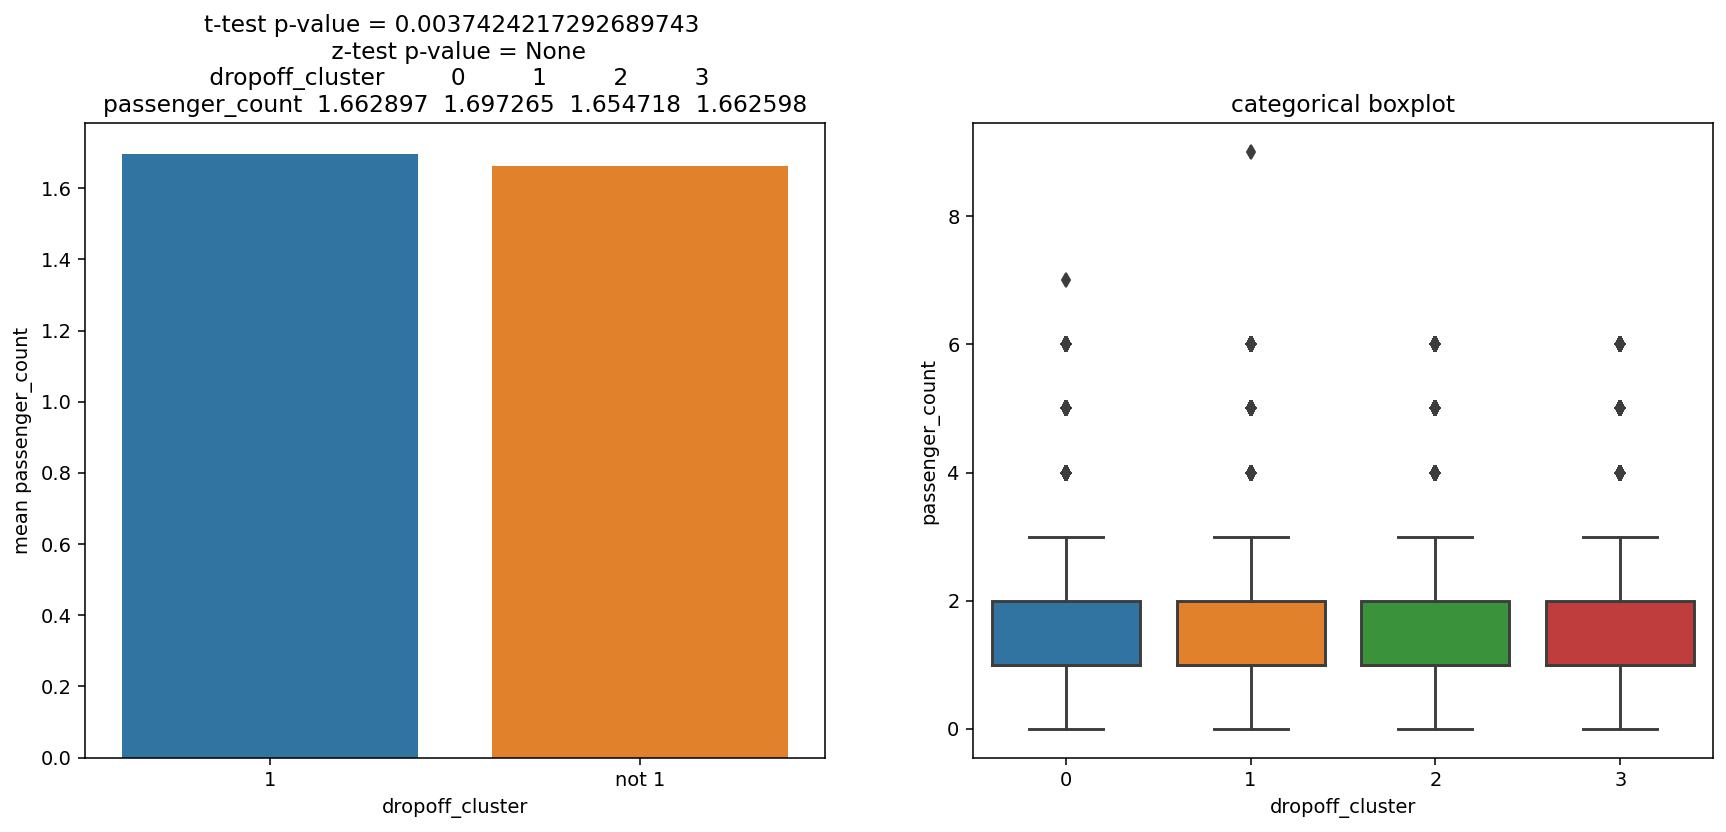

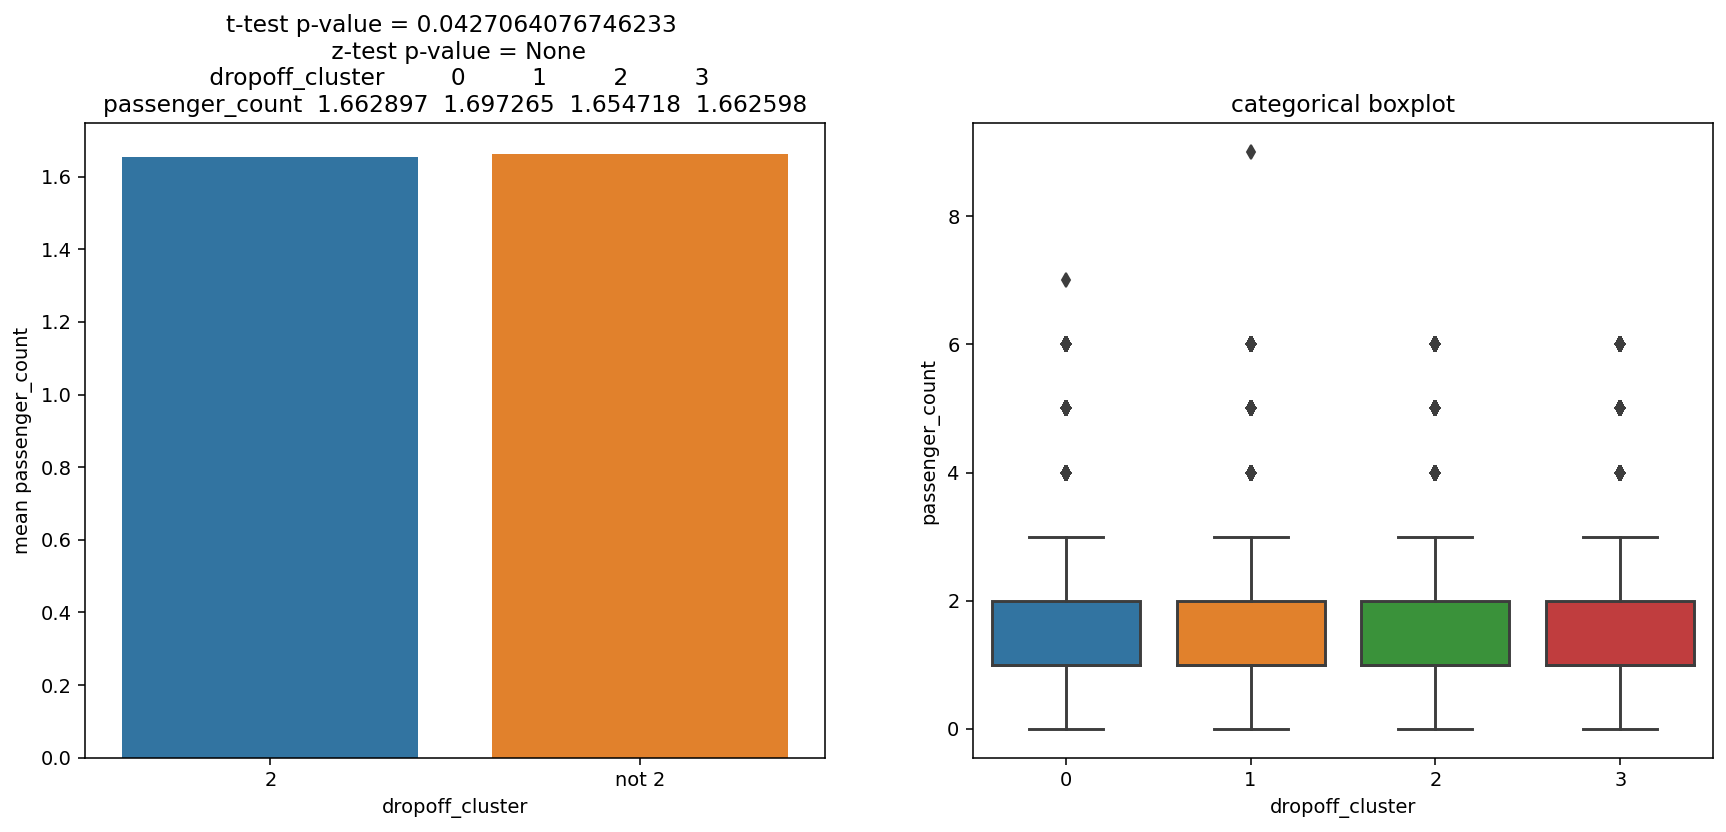

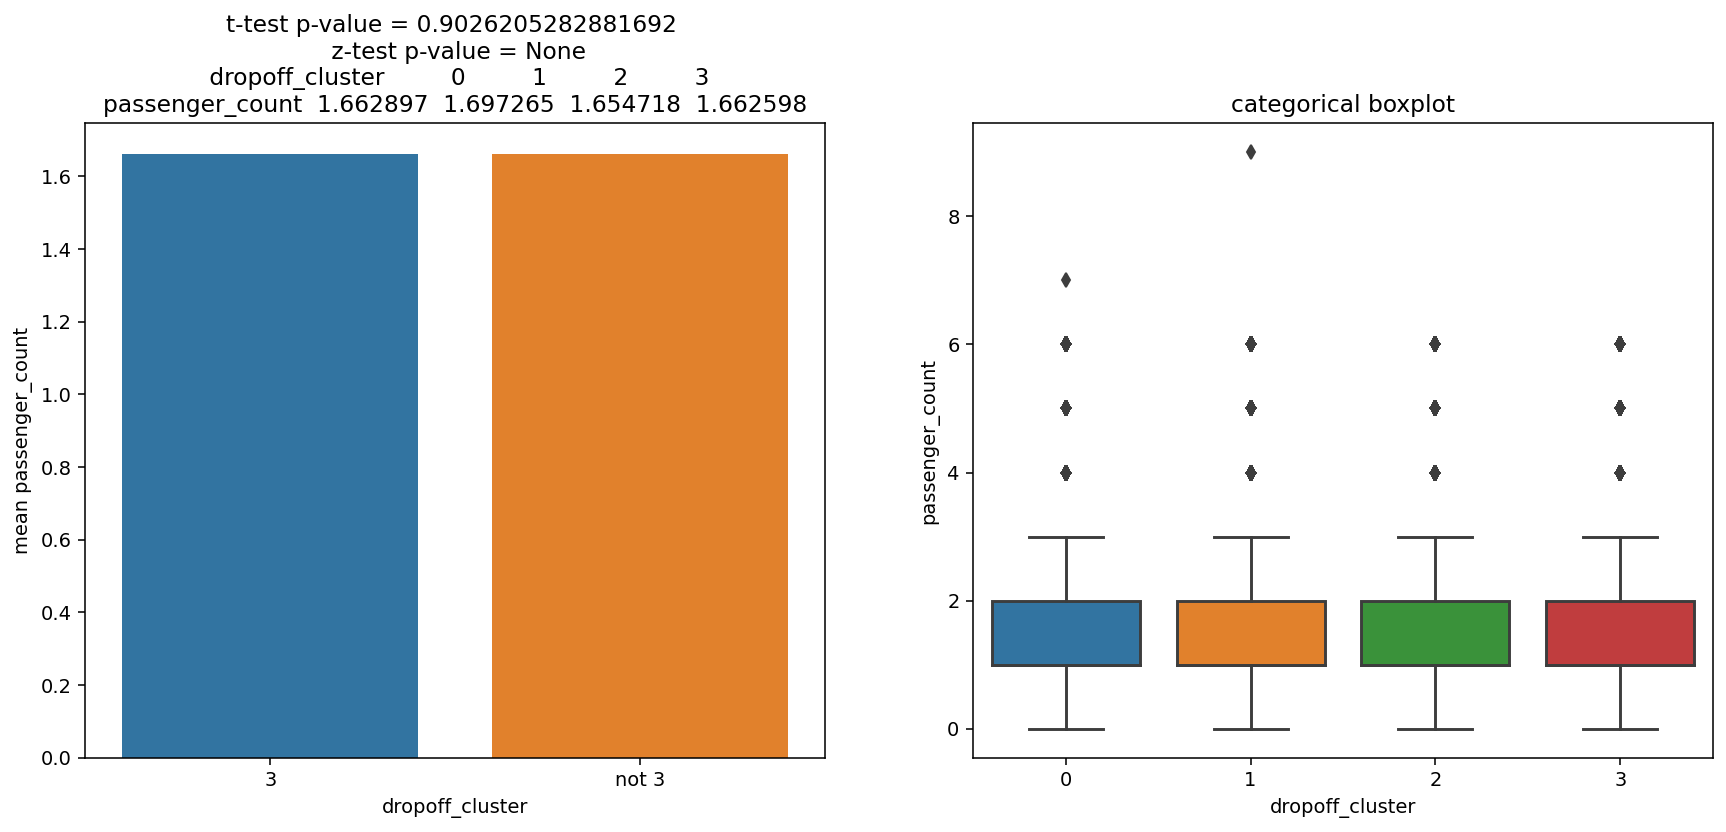

In [55]:
Bivariate_cont_cat(combined_data, 'passenger_count', 'dropoff_cluster', 0)
Bivariate_cont_cat(combined_data, 'passenger_count', 'dropoff_cluster', 1)
Bivariate_cont_cat(combined_data, 'passenger_count', 'dropoff_cluster', 2)
Bivariate_cont_cat(combined_data, 'passenger_count', 'dropoff_cluster', 3)

**Inferences**
We can safely accept the hypothesis in cluster 2 that the dropoff clusters affect the number of customers.\ 
There is no significant evidence
* **Duration**
    * On average taxies picked off and dropped off has **1.6 Passengers**
    * This data isnt significant 
* **Dropoff/Pickup_cluster**
   * Boxplot shows presence of few outliers on the lower end.

## Bivariate : Categorical-Categorical

Finally a quick look at the Categorical -Categorical Bivariate analysis\
Although we have only two values a quick evaluation is applied
- Hypothesis
Does the Vendor id relates to the stor flag

In [56]:
def BVA_categorical_plot(data, cat1, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,cat1]][:]

  #forming a crosstab
  table = pd.crosstab(data[cat1],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=cat1, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[cat1].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

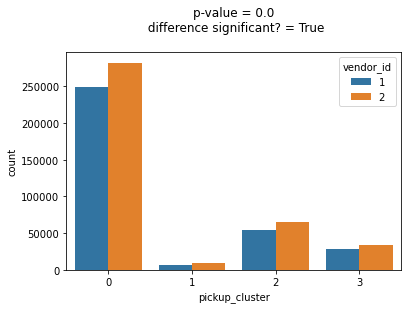

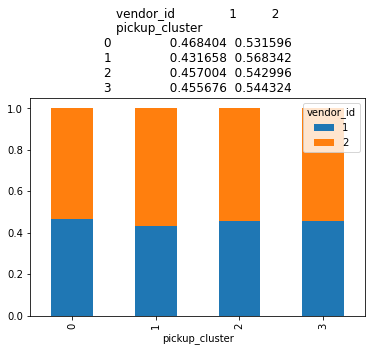

In [57]:
BVA_categorical_plot(combined_data, 'vendor_id','pickup_cluster')

####  Findings
- There is a significant difference between the clusters. As seen the volume of rides in 0 > 1 > 2 > 3
- It is interesting finding that the Vendor 2 leads in all the clusters


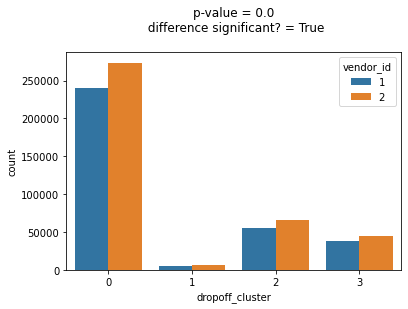

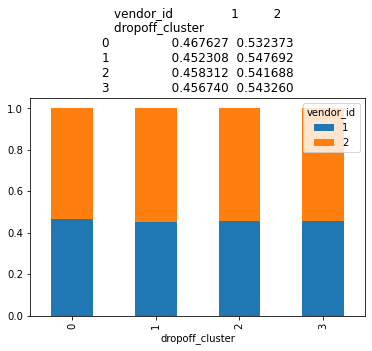

In [58]:
BVA_categorical_plot(combined_data, 'vendor_id','dropoff_cluster')

####  Findings
- There is a significant difference between the clusters also. As seen the volume of rides in 0 > 1 > 2 > 3
- It is interesting finding that the Vendor 2 also leads in all the dropoff clusters



### One last question to answer.
How do the clusters perform during the day of week and hour of day

In [59]:
combined_data['pickup_dayofweek'] = combined_data['pickup_dayofweek'].astype('category')
combined_data['pickup_hour'] = combined_data['pickup_hour'].astype('category')

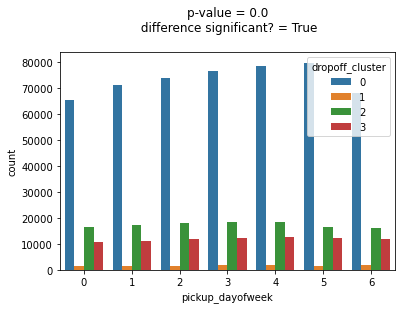

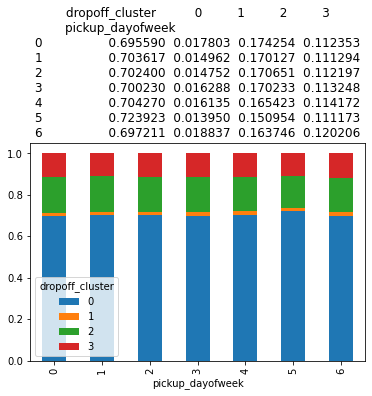

In [60]:
#N.B this represents values for pickup cluster and dropoff cluster combined with day of week
BVA_categorical_plot(combined_data,'dropoff_cluster', 'pickup_dayofweek')

* **Inferences**
    * Cluster 0 and 1 seems to bebusy all day long. 

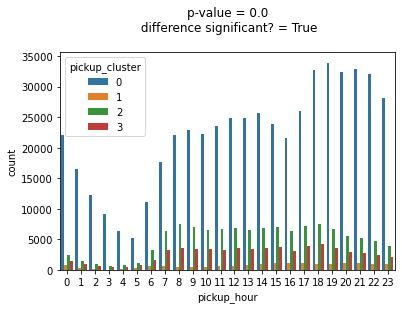

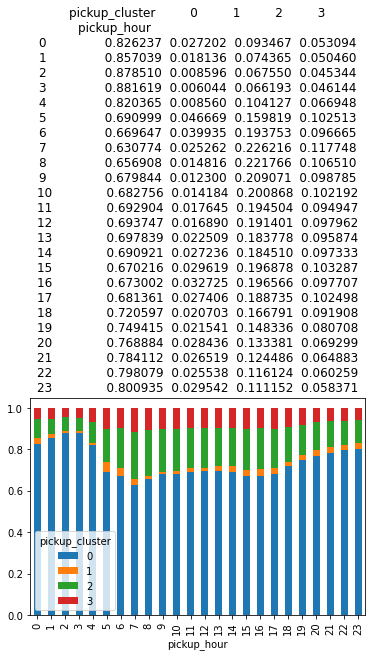

In [61]:
BVA_categorical_plot(combined_data,'pickup_cluster','pickup_hour' )

**Inferences**
*    **Pickup hour** 
    * Between 6:00HRS and 18:HRS The traffic is at highest.
*     **Clusters**
    * The most used clusters is also cluster 0 and 1
    * Looking at the cluster pickup time cluster. 0 is Active at Night hours and cluster 1 is Active in working hour.
    * Cluster 0 is residential Zone and rest while cluster 1 being busy in the day is a working Zone.


### Thank you very much reading